In [36]:
# !pip install xgboost
!pip install catboost


In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, chi2, SequentialFeatureSelector, SelectFromModel
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix,
                             ConfusionMatrixDisplay, roc_auc_score, roc_curve,
                             RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, f1_score)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

import xgboost as xgb
import lightgbm as lgb
from sklearn.decomposition import PCA
import shap
import catboost as cb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import time


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore")


ستون هایی که امکان ارتباط با ترک سیگار دارند

In [139]:
cols = ["x_smoker3", "x_llcpwt", "stopsmk2", "smokday2", "smoke100", "lastsmk2", "x_bmi5", "x_bmi5cat", "menthlth", "physhlth",
         "poorhlth", "genhlth", "cadult", "numadult", "hhadult", "x_age_g", "x_age80", "x_exteth3",
         "x_alteth3", "x_asthms1", "x_totinda", "x_ment14d", "x_phys14d", "copdbrth", "copdcogh", "sex1", "rmvteth4",
         "x_imprace", "x_educag", "marital", "x_incomg", "x_metstat", "x_urbstat", "employ1", "x_state", "weight2",
         "persdoc2", "checkup1", "pvtresd1", "exerany2", "sleptim1", "cvdinfr4", "cvdcrhd4", "cvdstrk3",
         "asthma3", "chccopd1", "havarth3", "addepev2", "chckdny1", "diabete3", "educa", "children", "height3",
         "diffwalk", "alcday5", "pneuvac4", "profexam", "lengexam", "sofemale", "somale", "casthdx2", "x_rfhlth",
         "x_ltasth1", "x_casthm1", "x_prace1", "x_racegr3", "x_ageg5yr", "wtkg3", "x_rfsmok3"]

# news = ["hlthcvr1","primins1","priminsr","ladult1","sexvar","x_incomg1","persdoc3","chccopd2","chccopd3","havarth4","havarth5","addepev3","chckdny2", "diabete4", "alcday4", "x_mrace1", "x_mrace2", "x_racegr4"]


# codes

In [ ]:
import zipfile
import os

!gdown --id 155E3dCHUM0fazP7yS_jV7W_CyGFJiLjK
# !gdown --id 1QdtD7qctXKLLQVNvM47L2WMh_BjxZ1D9
# !gdown --id 1gTmk3uUMlpzOe6pT3qCeHuJcN-fwCYfN
# !gdown --id 1X1YoZwy-AoWo-LwdFJGkqrtikLYxGFBH
# !gdown --id 1GvRUJXPoql-22ufdE314VyK5BotH3QjF
# !gdown --id 1_EKAW3PpSVbAR3cTAYO5qTg8yHnxHzKI
!gdown --id 1NxpQ3Ukr5X7DHhb1z4jkwPN3HqBDV7-s

# path = '/content/drive/MyDrive/Colab Notebooks/'
# path = '/kaggle/working/'
path = "/content/"

zip_filenames = ['BRFSS2023.zip']

for zip_filename in zip_filenames:
    if not os.path.exists(path + zip_filename):
        print(f"not find {zip_filename}")
    else:
        try:
            with zipfile.ZipFile(path + zip_filename, 'r') as zip_ref:
                zip_ref.extractall()
            print(f"extract completed {path + zip_filename}")

        except zipfile.BadZipFile:
            print("file not find")
        except Exception as e:
            print(f"exception {e}")


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=155E3dCHUM0fazP7yS_jV7W_CyGFJiLjK
To: /content/res v1.1.csv
100% 6.28k/6.28k [00:00<00:00, 14.9MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1NxpQ3Ukr5X7DHhb1z4jkwPN3HqBDV7-s
From (redirected): https://drive.google.com/uc?id=1NxpQ3Ukr5X7DHhb1z4jkwPN3HqBDV7-s&confirm=t&uuid=5f4126fa-96e8-4b81-a182-92af534b339d
To: /content/BRFSS2023.zip
100% 79.1M/79.1M [00:01<00:00, 51.7MB/s]
extract completed /content/BRFSS2023.zip


In [141]:
df = pd.read_stata("BRFSS2023.dta")

df = df.rename(columns={"ladult1":"cadult", "sexvar":"sex1", "primins1":"hlthpln1", "chccopd3":"chccopd1", "havarth4":"havarth3", "addepev3":"addepev2",
                                "chckdny2":"chckdny1", "diabete4":"diabete3", "alcday4":"alcday5", "x_mrace1":"x_prace1", "x_incomg1":"x_incomg", "persdoc3":"persdoc2"})
res = pd.read_csv(path + "res v1.1.csv", index_col="Unnamed: 0")
res


,2018,2019,2020,2021,2022,2023
x_smoker3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
x_llcpwt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
stopsmk2,0.860560,0.865789,0.870096,0.945413,0.957801,0.952373
smokday2,0.587787,0.597208,0.610322,0.618291,0.631451,0.633901
smoke100,0.037505,0.044323,0.051431,0.055759,0.078539,0.052081
...,...,...,...,...,...,...
x_prace1,0.000073,0.000053,0.000022,0.000009,0.000025,0.000586
x_racegr3,0.000002,0.000007,0.000002,0.000000,0.000004,0.000198
x_ageg5yr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
wtkg3,0.065317,0.071122,0.086944,0.092520,0.094529,0.078812


In [142]:
replacement_dict = {
    'x_smoker3' : [9],
    'weight2': [7777, 9999],
    'height3': [7777, 9999],
    'children': [99],
    'hhadult': [77, 99],
    'alcday5': [777, 999],
    'menthlth': [77, 99],
    'physhlth': [77, 99],
    'poorhlth': [77, 99],
    'smoke100': [7, 9],
    'genhlth': [7, 9],
    '_smoker3': [9],
    'stopsmk2': [7, 9, 77, 99],
    '_asthms1': [9],
    '_ltasth1': [9],
    '_casthm1': [9],
    '_totinda': [9],
    'exerany2': [7, 9],
    '_ment14d': [9],
    '_phys14d': [9],
    '_prace1': [77, 99],
    'educa': [9],
    '_educag': [9],
    'marital': [9],
    'incomg2': [77, 99],
    '_incomg': [9],
    'employ1': [9],
    'persdoc2': [7, 9],
    'checkup1': [7, 9],
    'cvdinfr4': [7, 9],
    'cvdcrhd4': [7, 9],
    'cvdstrk3': [7, 9],
    'asthma3': [7, 9],
    'chccopd1': [7, 9],
    'havarth3': [7, 9],
    'addepev2': [7, 9],
    'chckdny1': [7, 9],
    'diabete3': [7, 9],
    'diffwalk': [7, 9],
    'pneuvac4': [7, 9],
    '_rfhlth': [9],
    '_rfsmok3': [9]
}


cols_in_df = [col for col in replacement_dict.keys() if col in df.columns]
for col in cols_in_df:
    df[col] = df[col].replace(replacement_dict[col], np.nan)


In [143]:
print(df.shape)
df.dropna(subset=["x_smoker3"],inplace=True)
df.shape


(433323, 350)


(410261, 350)

In [144]:
res_na = res[res<=0.5].dropna(axis=0)
res_na.index


Index(['x_smoker3', 'x_llcpwt', 'smoke100', 'x_bmi5', 'x_bmi5cat', 'menthlth',
       'physhlth', 'genhlth', 'hhadult', 'x_age_g', 'x_age80', 'x_asthms1',
       'x_totinda', 'x_ment14d', 'x_phys14d', 'sex1', 'x_imprace', 'x_educag',
       'marital', 'x_incomg', 'x_metstat', 'x_urbstat', 'employ1', 'x_state',
       'weight2', 'persdoc2', 'checkup1', 'exerany2', 'cvdinfr4', 'cvdcrhd4',
       'cvdstrk3', 'asthma3', 'chccopd1', 'havarth3', 'addepev2', 'chckdny1',
       'diabete3', 'educa', 'children', 'height3', 'diffwalk', 'alcday5',
       'pneuvac4', 'x_rfhlth', 'x_ltasth1', 'x_casthm1', 'x_prace1',
       'x_racegr3', 'x_ageg5yr', 'wtkg3', 'x_rfsmok3'],
      dtype='object')

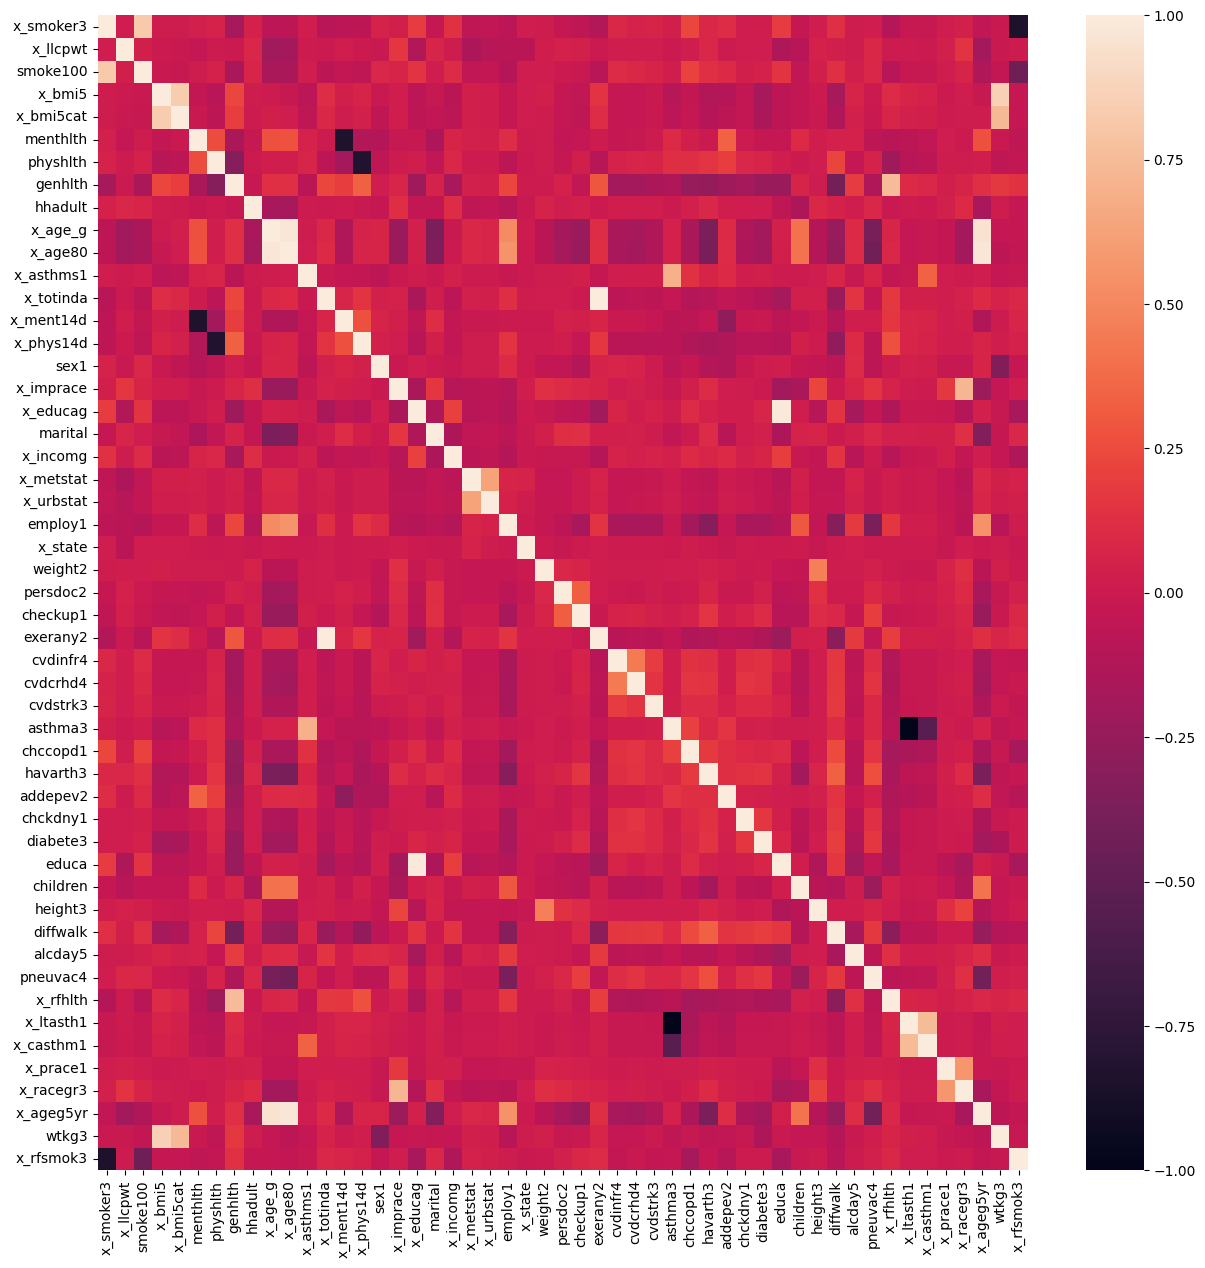

In [145]:
correlation = df[res_na.index].corr()

plt.figure(figsize=(15,15))
sns.heatmap(df[res_na.index].corr())
plt.show()


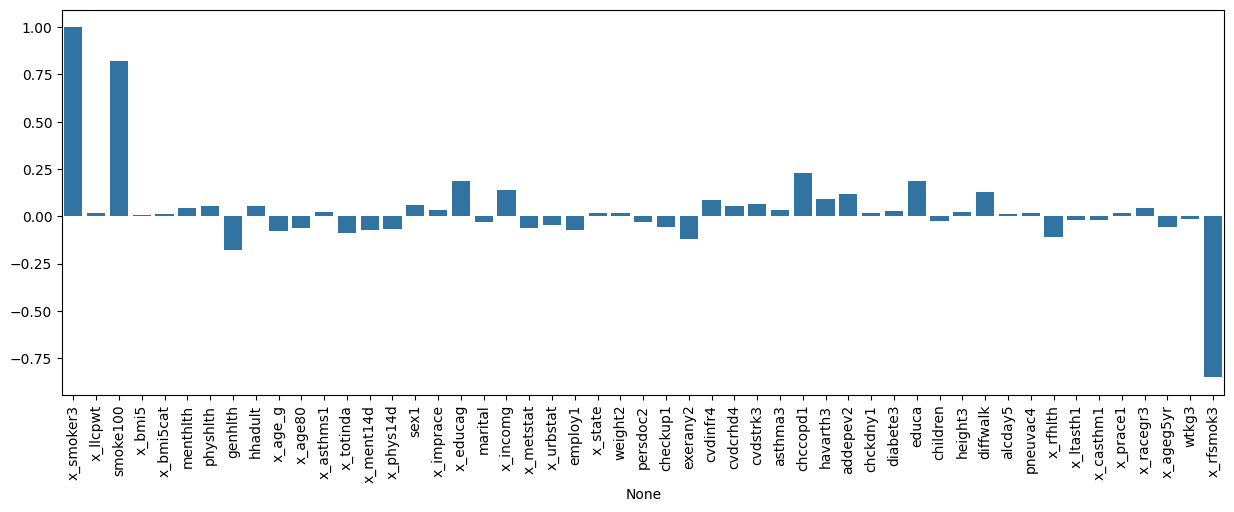

In [146]:
plt.figure(figsize=(15,5))
sns.barplot(y=correlation.x_smoker3.values, x=correlation.x_smoker3.index)
plt.xticks(rotation=90)
plt.show()


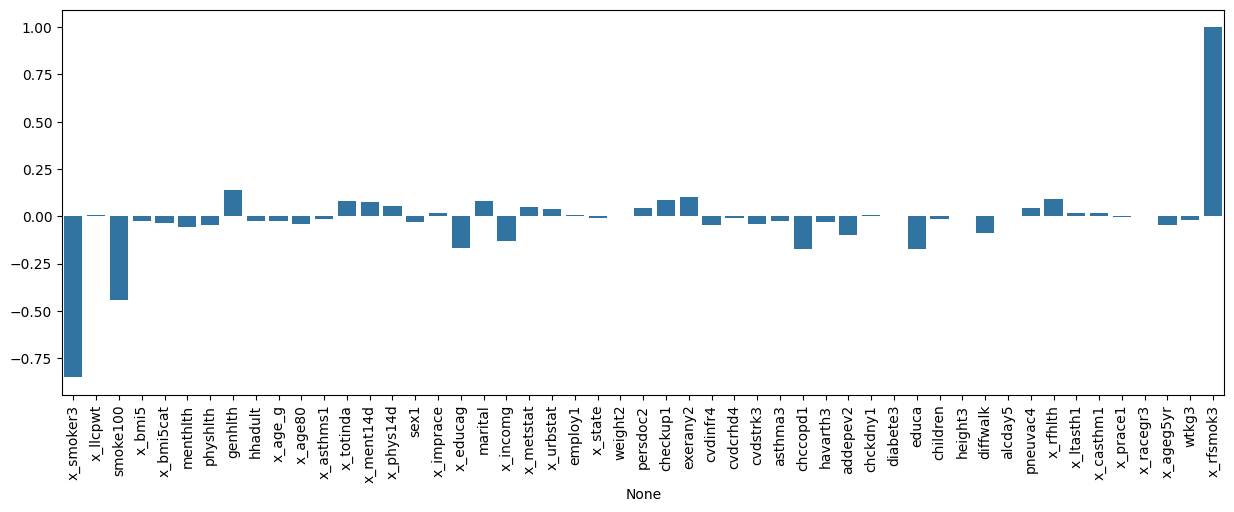

In [147]:
plt.figure(figsize=(15,5))
sns.barplot(y=correlation.x_rfsmok3.values, x=correlation.x_rfsmok3.index)
plt.xticks(rotation=90)
plt.show()


In [148]:
# from res_na

numerical_features = [
    'x_llcpwt','x_age80','x_bmi5','weight2','wtkg3','height3',
    'children','hhadult','alcday5','menthlth','physhlth','poorhlth'
]

categorical_features = [
    'smoke100','x_bmi5cat','genhlth','x_age_g','x_asthms1','x_ltasth1','x_casthm1',
    'x_totinda','exerany2','x_ment14d','x_phys14d','sex1','x_imprace','x_prace1','x_racegr3',
    'x_educag','educa','marital','x_incomg','x_metstat','x_urbstat','employ1','x_state',
    'persdoc2','checkup1','cvdinfr4','cvdcrhd4','cvdstrk3','asthma3','chccopd1','havarth3','addepev2',
    'chckdny1','diabete3','diffwalk','pneuvac4','x_rfhlth','x_rfsmok3','x_ageg5yr'
]

len(numerical_features+categorical_features)


51

In [149]:
categorical_features.remove("smoke100")
categorical_features.remove("x_rfsmok3")
numerical_features.remove("x_llcpwt")

len(numerical_features+categorical_features)


48

In [150]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),                # پر کردن مقادیر گمشده عددی با میانگین
    ('scaler', StandardScaler())                                # مقیاس‌بندی ویژگی‌های عددی
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),       # پر کردن مقادیر گمشده متنی/منطقی با مد (پرتکرارترین)
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='passthrough'
)


In [151]:
df2018_without_4_smoker3 = df.copy()

df2018_without_4_smoker3['x_smoker3'].replace(4, np.nan, inplace=True)

df2018_without_4_smoker3.dropna(subset=['x_smoker3'], inplace=True)

df2018_without_4_smoker3['x_smoker3'] = df2018_without_4_smoker3['x_smoker3'].astype(int)
mapping_dict = {
    1: 0,
    2: 0,
    3: 1
}
df2018_without_4_smoker3['x_smoker3'] = df2018_without_4_smoker3['x_smoker3'].map(mapping_dict)

df2018_without_4_smoker3['x_smoker3'].value_counts()


,count
x_smoker3,
1,113134
0,45146


In [152]:
X = df2018_without_4_smoker3[numerical_features+categorical_features]
y = df2018_without_4_smoker3["x_smoker3"]


In [153]:
scale_pos_weight = y.value_counts()[0] / y.value_counts()[1]
scale_pos_weight


np.float64(0.39904891544540105)

In [154]:
X_processed = preprocessor.fit_transform(X)
print(f"\nShape of data after preprocessing: {X_processed.shape}")

feature_names_processed = preprocessor.get_feature_names_out()
print(f"Number of features after preprocessing: {len(feature_names_processed)}")

feature_names_processed



Shape of data after preprocessing: (158280, 48)
Number of features after preprocessing: 48


array(['num__x_age80', 'num__x_bmi5', 'num__weight2', 'num__wtkg3',
       'num__height3', 'num__children', 'num__hhadult', 'num__alcday5',
       'num__menthlth', 'num__physhlth', 'num__poorhlth',
       'cat__x_bmi5cat', 'cat__genhlth', 'cat__x_age_g', 'cat__x_asthms1',
       'cat__x_ltasth1', 'cat__x_casthm1', 'cat__x_totinda',
       'cat__exerany2', 'cat__x_ment14d', 'cat__x_phys14d', 'cat__sex1',
       'cat__x_imprace', 'cat__x_prace1', 'cat__x_racegr3',
       'cat__x_educag', 'cat__educa', 'cat__marital', 'cat__x_incomg',
       'cat__x_metstat', 'cat__x_urbstat', 'cat__employ1', 'cat__x_state',
       'cat__persdoc2', 'cat__checkup1', 'cat__cvdinfr4', 'cat__cvdcrhd4',
       'cat__cvdstrk3', 'cat__asthma3', 'cat__chccopd1', 'cat__havarth3',
       'cat__addepev2', 'cat__chckdny1', 'cat__diabete3', 'cat__diffwalk',
       'cat__pneuvac4', 'cat__x_rfhlth', 'cat__x_ageg5yr'], dtype=object)

In [155]:
X_processed_df = pd.DataFrame(X_processed, columns=numerical_features+categorical_features)


In [156]:
weights = df2018_without_4_smoker3["x_llcpwt"]


## Feature Engineering

In [157]:
# Define the full pipeline for preprocessing + feature selection
k=30
feature_selection_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_classif, k=k))       # Select top K best features
])

feature_selection_pipeline.fit(X, y)

# Get the scores for each feature
feature_scores = feature_selection_pipeline.named_steps['selector'].scores_

numerical_feature_names = numerical_features
# Get one-hot encoded feature names
onehot_features = feature_selection_pipeline.named_steps['preprocessor'].named_transformers_['cat']
categorical_feature_names_onehot = onehot_features.get_feature_names_out(categorical_features)

# Combine all processed feature names
all_processed_feature_names = list(numerical_feature_names) + list(categorical_feature_names_onehot)

feature_scores_series = pd.Series(feature_scores, index=all_processed_feature_names)
sorted_features = feature_scores_series.sort_values(ascending=False)
selected_features_names = sorted_features.head(feature_selection_pipeline.named_steps['selector'].k).index.tolist()

print(f"Method used for Feature Selection: SelectKBest with f_classif (selecting top {feature_selection_pipeline.named_steps['selector'].k} features)")
print("\nTop features based on f_classif score:")
print(sorted_features.head(30))

print(f"\nSelected {feature_selection_pipeline.named_steps['selector'].k} Features:")
print(selected_features_names)


Method used for Feature Selection: SelectKBest with f_classif (selecting top 30 features)

Top features based on f_classif score:
x_age80      7763.540721
x_ageg5yr    7681.933690
educa        6107.872794
x_age_g      5913.150298
x_educag     5544.125401
marital      4495.031177
x_incomg     3387.621206
checkup1     3304.801262
pneuvac4     2746.428318
genhlth      2403.161112
exerany2     1864.811666
chccopd1     1835.096614
x_ment14d    1560.515399
addepev2     1432.592363
menthlth     1391.661107
x_imprace    1220.017261
x_totinda    1193.541515
x_rfhlth     1062.855858
x_bmi5cat     925.110742
persdoc2      915.423814
employ1       806.237058
children      729.287769
wtkg3         688.820470
x_racegr3     640.793469
x_bmi5        557.759204
diffwalk      471.675631
havarth3      418.795754
physhlth      321.595975
x_phys14d     308.001822
poorhlth      301.079623
dtype: float64

Selected 30 Features:
['x_age80', 'x_ageg5yr', 'educa', 'x_age_g', 'x_educag', 'marital', 'x_incomg', 'c

Method 2: Recursive Feature Elimination (RFE)

In [158]:
# Initialize RFE. Select a base estimator and specify the number of features to select.
rfe_selector = RFE(estimator=LogisticRegression(random_state=42, max_iter=200), n_features_to_select=7)

# Fit RFE on the processed data (X_processed) and the target (y)
rfe_selector.fit(X_processed, y)

# Get the boolean mask of selected features and their ranking
selected_features_mask_rfe = rfe_selector.support_
feature_ranking_rfe = rfe_selector.ranking_

# Get the names of the selected features based on the mask
selected_features_names_rfe = feature_names_processed[selected_features_mask_rfe].tolist()

print("Selected features by RFE:")
print(selected_features_names_rfe)


Selected features by RFE:
['num__x_age80', 'cat__x_age_g', 'cat__exerany2', 'cat__educa', 'cat__chccopd1', 'cat__chckdny1', 'cat__pneuvac4']


Method 3: Feature Importance from RandomForestClassifier

In [159]:
rf_model_for_importance = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model on the processed data (X_processed) and the target (y)
rf_model_for_importance.fit(X_processed, y, sample_weight=weights)

# Get the feature importances from the fitted model
feature_importances_rf = rf_model_for_importance.feature_importances_

feature_importances_series_rf = pd.Series(feature_importances_rf, index=feature_names_processed)
sorted_feature_importances_rf = feature_importances_series_rf.sort_values(ascending=False)

print("Top features based on RandomForest feature importance:")
print(sorted_feature_importances_rf.head(20))

top_k_features_names_rf = sorted_feature_importances_rf.head(20).index.tolist()

print(f"\nTop 20 feature names selected by RandomForest importance:")
print(top_k_features_names_rf)


Top features based on RandomForest feature importance:
num__x_bmi5       0.066521
num__x_age80      0.065873
cat__x_state      0.054613
num__weight2      0.053549
num__wtkg3        0.052869
num__height3      0.046521
cat__x_incomg     0.041077
cat__x_ageg5yr    0.040854
num__alcday5      0.036581
cat__marital      0.032916
num__hhadult      0.028166
num__poorhlth     0.025994
num__menthlth     0.025977
num__physhlth     0.024390
cat__x_educag     0.024326
cat__genhlth      0.023638
cat__x_age_g      0.023578
cat__employ1      0.023400
cat__educa        0.022872
cat__checkup1     0.019849
dtype: float64

Top 20 feature names selected by RandomForest importance:
['num__x_bmi5', 'num__x_age80', 'cat__x_state', 'num__weight2', 'num__wtkg3', 'num__height3', 'cat__x_incomg', 'cat__x_ageg5yr', 'num__alcday5', 'cat__marital', 'num__hhadult', 'num__poorhlth', 'num__menthlth', 'num__physhlth', 'cat__x_educag', 'cat__genhlth', 'cat__x_age_g', 'cat__employ1', 'cat__educa', 'cat__checkup1']


In [160]:
sorted_feature_importances_rf


,0
num__x_bmi5,0.066521
num__x_age80,0.065873
cat__x_state,0.054613
num__weight2,0.053549
num__wtkg3,0.052869
num__height3,0.046521
cat__x_incomg,0.041077
cat__x_ageg5yr,0.040854
num__alcday5,0.036581
cat__marital,0.032916


Variance Threshold

In [161]:
selector_vt = VarianceThreshold(threshold=0.5)

selected_features_mask_vt = selector_vt.fit(X_processed).get_support()
selected_features_names_vt = feature_names_processed[selected_features_mask_vt].tolist()

print(f"تعداد ویژگی‌های انتخاب شده توسط Variance Threshold: {len(selected_features_names_vt)}")
print("ویژگی‌های انتخاب شده:")
print(selected_features_names_vt)


تعداد ویژگی‌های انتخاب شده توسط Variance Threshold: 30
ویژگی‌های انتخاب شده:
['num__x_age80', 'num__x_bmi5', 'num__weight2', 'num__wtkg3', 'num__height3', 'num__children', 'num__hhadult', 'num__alcday5', 'num__menthlth', 'num__physhlth', 'num__poorhlth', 'cat__x_bmi5cat', 'cat__genhlth', 'cat__x_age_g', 'cat__x_asthms1', 'cat__x_casthm1', 'cat__x_ment14d', 'cat__x_phys14d', 'cat__x_imprace', 'cat__x_prace1', 'cat__x_racegr3', 'cat__x_educag', 'cat__educa', 'cat__marital', 'cat__x_incomg', 'cat__employ1', 'cat__x_state', 'cat__checkup1', 'cat__diabete3', 'cat__x_ageg5yr']


۲. Correlation Matrix (ماتریس همبستگی)
این روش برای کاهش همخطی چندگانه (Multicollinearity) استفاده می‌شود. ویژگی‌هایی که همبستگی بسیار بالایی با یکدیگر دارند را شناسایی و یکی از آن‌ها را حذف می‌کند. این کار به پایداری و تفسیرپذیری مدل‌های خطی کمک می‌کند.

In [162]:
# محاسبه ماتریس همبستگی. abs() برای در نظر گرفتن همبستگی مثبت و منفی.
corr_matrix = X_processed_df.corr().abs()

# انتخاب مثلث بالایی ماتریس همبستگی برای جلوگیری از تکرار و مقادیر روی قطر اصلی
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 0.9 یک آستانه رایج است، می‌توانید آن را تغییر دهید.
to_drop_high_corr = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

# ویژگی‌های باقی‌مانده (انتخاب‌شده)
selected_features_names_corr = [col for col in feature_names_processed if col not in to_drop_high_corr]

print(f"ویژگی‌های حذف شده به دلیل همبستگی بالا (>0.9): {to_drop_high_corr}")
print(f"تعداد ویژگی‌های انتخاب شده بعد از حذف همبستگی بالا: {len(selected_features_names_corr)}")
print("ویژگی‌های انتخاب شده:")
print(selected_features_names_corr)


ویژگی‌های حذف شده به دلیل همبستگی بالا (>0.9): ['x_age_g', 'educa', 'x_ageg5yr']
تعداد ویژگی‌های انتخاب شده بعد از حذف همبستگی بالا: 48
ویژگی‌های انتخاب شده:
['num__x_age80', 'num__x_bmi5', 'num__weight2', 'num__wtkg3', 'num__height3', 'num__children', 'num__hhadult', 'num__alcday5', 'num__menthlth', 'num__physhlth', 'num__poorhlth', 'cat__x_bmi5cat', 'cat__genhlth', 'cat__x_age_g', 'cat__x_asthms1', 'cat__x_ltasth1', 'cat__x_casthm1', 'cat__x_totinda', 'cat__exerany2', 'cat__x_ment14d', 'cat__x_phys14d', 'cat__sex1', 'cat__x_imprace', 'cat__x_prace1', 'cat__x_racegr3', 'cat__x_educag', 'cat__educa', 'cat__marital', 'cat__x_incomg', 'cat__x_metstat', 'cat__x_urbstat', 'cat__employ1', 'cat__x_state', 'cat__persdoc2', 'cat__checkup1', 'cat__cvdinfr4', 'cat__cvdcrhd4', 'cat__cvdstrk3', 'cat__asthma3', 'cat__chccopd1', 'cat__havarth3', 'cat__addepev2', 'cat__chckdny1', 'cat__diabete3', 'cat__diffwalk', 'cat__pneuvac4', 'cat__x_rfhlth', 'cat__x_ageg5yr']


### VIF Method

In [62]:
# def calculate_vif(df_features):
#     variables = df_features.copy()
#     threshold = 5.0

#     while True:
#         vif_df = pd.DataFrame()
#         vif_df["Feature"] = variables.columns

#         vif_df["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
#         max_vif = vif_df["VIF"].max()

#         if max_vif > threshold:
#             feature_with_max_vif = vif_df.sort_values(by="VIF", ascending=False).iloc[0]["Feature"]
#             print(f"remove feature'{feature_with_max_vif}' with VIF = {max_vif:.2f}")

#             variables = variables.drop(columns=[feature_with_max_vif])
#         else:
#             print(f"can't find any feature with vif bigger than {threshold}")
#             break

#     print("\n End of vif removing features process")
#     print(vif_df.sort_values(by="VIF", ascending=False))
#     return variables.columns.tolist()

# selected_features_vif = calculate_vif(X_processed_df)
# print(f"\nselected features with VIF method:")
# print(selected_features_vif)
# X_vif_selected = X_processed_df[selected_features_vif]


In [163]:
vif_less_than_7 = ['x_age80', 'x_bmi5', 'weight2', 'wtkg3', 'height3', 'children', 'hhadult', 'alcday5', 'menthlth', 'physhlth', 'poorhlth', 'x_casthm1', 'x_totinda', 'x_ment14d', 'x_phys14d', 'x_imprace', 'x_prace1', 'marital', 'x_incomg', 'employ1', 'x_state', 'persdoc2', 'checkup1', 'x_rfhlth']
X_processed_df_vif = X_processed_df[vif_less_than_7]
X_processed_df_vif.shape


(158280, 24)

In [164]:
numerical_features_selected = [f for f in vif_less_than_7 if f in numerical_features]
categorical_features_selected = [f for f in vif_less_than_7 if f in categorical_features]

preprocessor_vif = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features_selected),
        ('cat', categorical_pipeline, categorical_features_selected)
    ],
    remainder='passthrough'
)

X_vif = df2018_without_4_smoker3[vif_less_than_7]


مدل‌های مبتنی بر درخت مانند Random Forest، XGBoost و LightGBM به هم‌خطی (Multicollinearity) حساسیت بسیار کمی دارند.

#### منحنی Precision-Recall

برای داده‌های نامتوازن، این نمودار اغلب آموزنده‌تر از ROC است، چون بر عملکرد مدل روی کلاس اقلیت (در اینجا، سیگاری‌های سابق) تمرکز می‌کند.

Precision: از بین تمام کسانی که مدل گفته "ترک کرده‌اند"، چند درصدشان واقعاً ترک کرده بودند؟

Recall: از بین تمام کسانی که واقعاً ترک کرده‌اند، مدل توانسته چند درصدشان را شناسایی کند؟

#### منحنی AUC-ROC

این منحنی، نرخ True Positive Rate (Recall) را در مقابل نرخ False Positive Rate در آستانه‌های مختلف طبقه‌بندی رسم می‌کند.

عملکرد ایده‌آل: منحنی‌ای که به گوشه بالا-چپ نزدیک‌تر است.

مقدار AUC: سطح زیر این منحنی. عددی بین ۰.۵ (مدل تصادفی) و ۱.۰ (مدل کامل). هر چه به ۱ نزدیک‌تر باشد، بهتر است.

# White/Black box models on VIF/ALL features

In [165]:
def run_full_analysis(model_name, model_constructor_func, preprocessor_instance, X_data, y_data, weights_data):
    model_instance = model_constructor_func()

    # split data
    le = LabelEncoder()
    y_encoded = le.fit_transform(y_data)
    target_names_original = le.inverse_transform(np.unique(y_encoded)).astype(str)
    X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
        X_data, y_encoded, weights_data, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # pipline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor_instance),
        ('classifier', model_instance)
    ])

    print(f"\n===== Training model: {model_name} =====")
    start_time = time.time()
    if isinstance(model_instance, LDA):
        print("Model is LDA, fitting without sample_weight.")
        pipeline.fit(X_train, y_train)
    else:
        # other model train with weights
        pipeline.fit(X_train, y_train, classifier__sample_weight=weights_train)
    training_time = time.time() - start_time


    # evaluate
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_proba)

    print(f"Training completed in {training_time:.2f} seconds.")
    print(f"Accuracy: {accuracy:.4f} | F1-Score: {f1:.4f} | AUC: {auc:.4f}")


    # Evaluation plots
    fig, axes = plt.subplots(1, 3, figsize=(21, 5))
    fig.suptitle(f"Evaluation for {model_name}", fontsize=16)
    ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, ax=axes[0], cmap=plt.cm.Blues)
    RocCurveDisplay.from_estimator(pipeline, X_test, y_test, ax=axes[1])
    PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test, ax=axes[2])
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


    # analysis for each model
    fitted_preprocessor = pipeline.named_steps['preprocessor']
    final_model = pipeline.named_steps['classifier']
    feature_names = fitted_preprocessor.get_feature_names_out()

    if isinstance(final_model, (LogisticRegression, LDA)):
        print("\n--- Coefficient Analysis ---")
        coefficients = final_model.coef_[0]
        feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
        if isinstance(final_model, LogisticRegression):
            feature_importance['Odds_Ratio'] = np.exp(coefficients)

        # sort by abs of coeff
        feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
        print(feature_importance.sort_values(by='Abs_Coefficient', ascending=False).drop(columns='Abs_Coefficient'))

    elif isinstance(final_model, DecisionTreeClassifier):
        print("\n--- Decision Tree Analysis ---")
        plt.figure(figsize=(40, 20))
        plot_tree(final_model, feature_names=feature_names, class_names=target_names_original,
                  filled=True, rounded=True, fontsize=7, max_depth=5)
        plt.title(f"Decision Tree for {model_name}")
        plt.show()

        # show tree conditions in text
        tree_rules = export_text(final_model, feature_names=list(feature_names))
        print("Tree Rules (first few levels):\n", "\n".join(tree_rules.splitlines()[:20]))

    elif isinstance(final_model, (xgb.XGBClassifier, lgb.LGBMClassifier, cb.CatBoostClassifier)):
        print(f"\n--- SHAP Analysis for {model_name} ---")
        X_test_transformed = fitted_preprocessor.transform(X_test)
        X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)
        explainer = shap.TreeExplainer(final_model)
        shap_values = explainer.shap_values(X_test_transformed_df)

        shap.summary_plot(shap_values, X_test_transformed_df, show=False)
        plt.title(f'SHAP Summary Plot - {model_name}')
        plt.show()

    return {'Model': model_name, 'Accuracy': accuracy, 'F1-Score': f1, 'AUC': auc, 'Time (s)': training_time}

# models
models_to_run_full_suite = {
    # Boosting Models
    'XGBoost': lambda: xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42),
    'LightGBM': lambda: lgb.LGBMClassifier(objective='binary', scale_pos_weight=scale_pos_weight, random_state=42),
    'CatBoost': lambda: cb.CatBoostClassifier(scale_pos_weight=scale_pos_weight, random_state=42, verbose=0),

    # Classic & Interpretable Models
    'Logistic Regression': lambda: LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': lambda: DecisionTreeClassifier(max_depth=7, random_state=42, min_samples_split=20, min_samples_leaf=10),
    'LDA': lambda: LDA()
}

# store results
vif_results = []
all_features_results = []



Analysis with VIF Selected Features

===== Training model: XGBoost (VIF) =====
Training completed in 1.71 seconds.
Accuracy: 0.6805 | F1-Score: 0.6940 | AUC: 0.7377


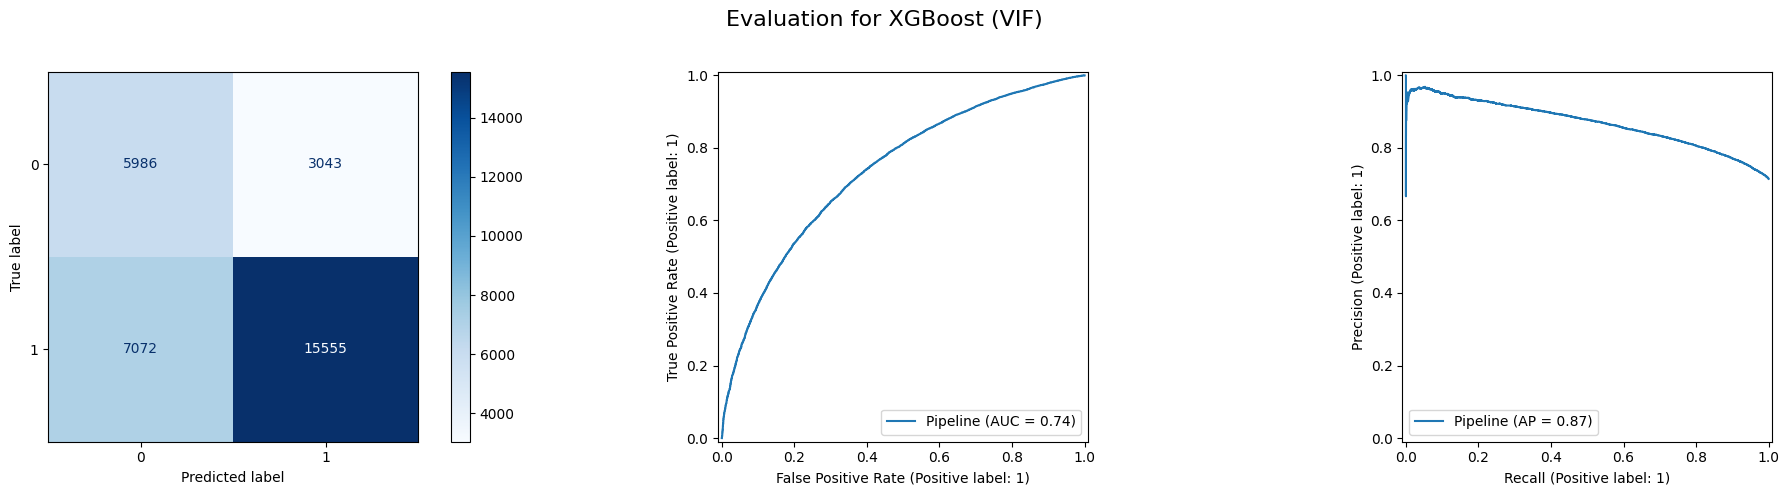


--- SHAP Analysis for XGBoost (VIF) ---


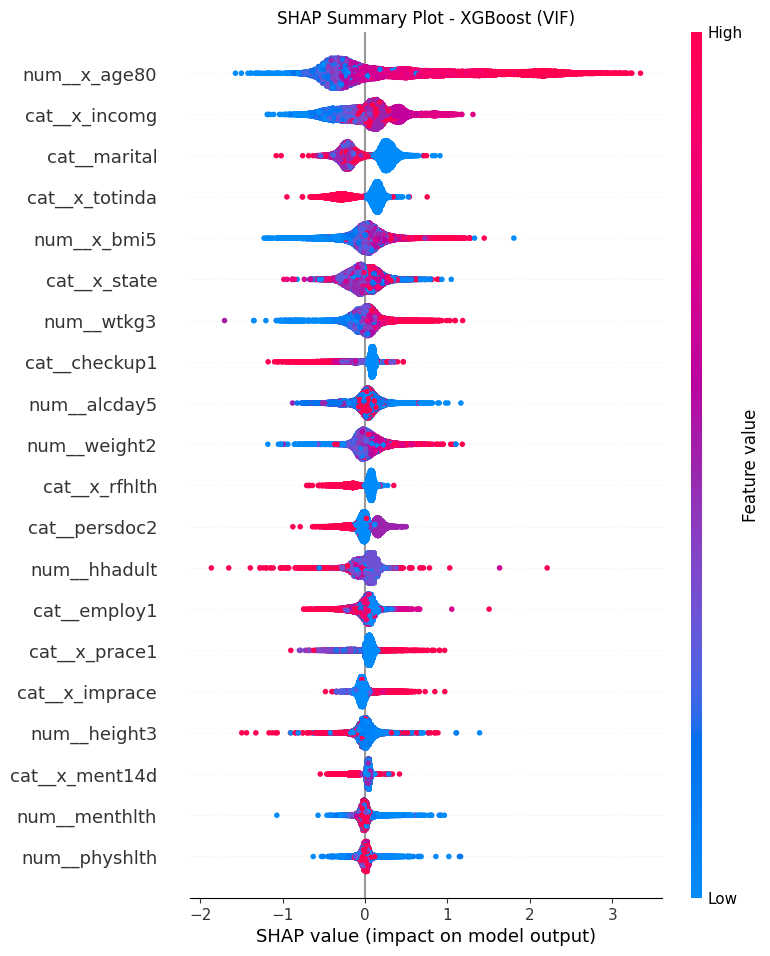


===== Training model: LightGBM (VIF) =====
[LightGBM] [Info] Number of positive: 90507, number of negative: 36117
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1230
[LightGBM] [Info] Number of data points in the train set: 126624, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.675534 -> initscore=0.733324
[LightGBM] [Info] Start training from score 0.733324
Training completed in 2.98 seconds.
Accuracy: 0.6750 | F1-Score: 0.6902 | AUC: 0.7537


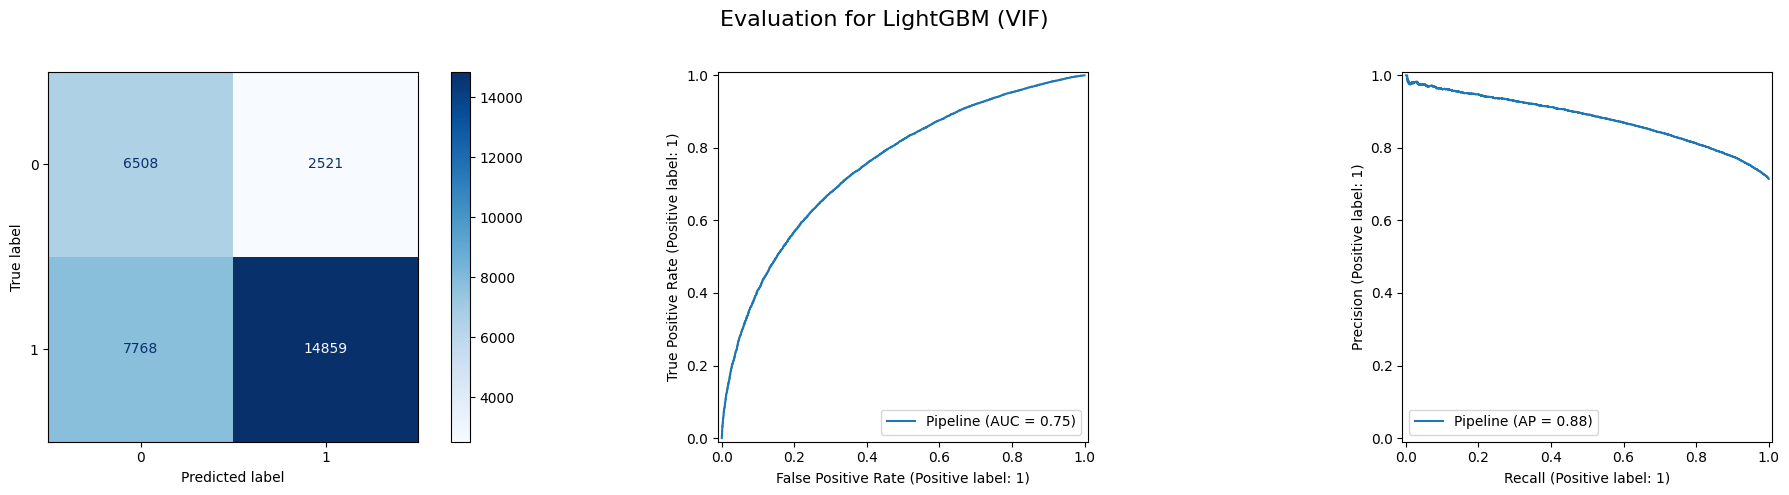


--- SHAP Analysis for LightGBM (VIF) ---


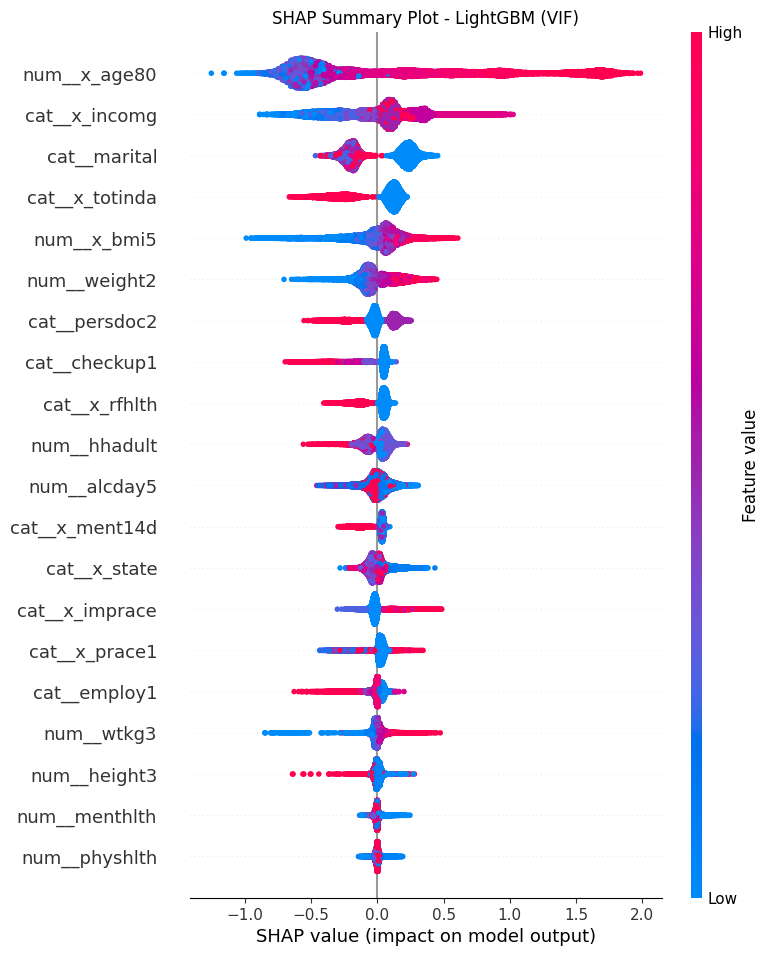


===== Training model: CatBoost (VIF) =====
Training completed in 42.20 seconds.
Accuracy: 0.6848 | F1-Score: 0.6983 | AUC: 0.7489


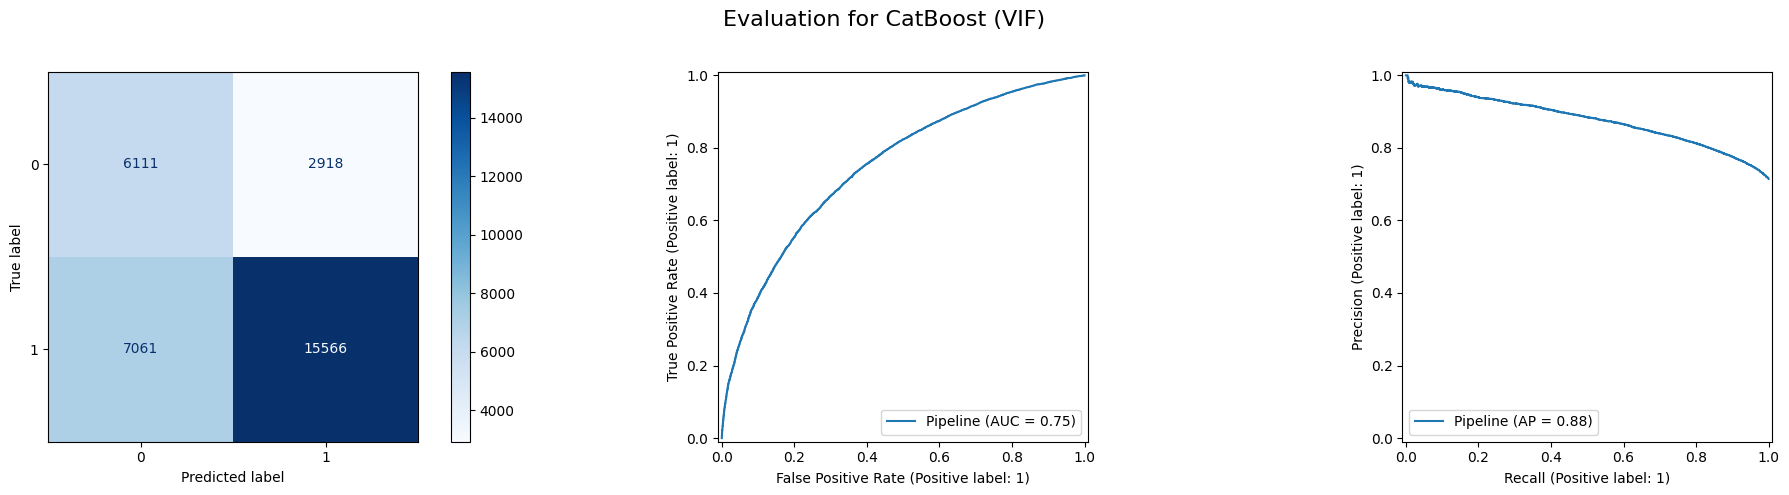


--- SHAP Analysis for CatBoost (VIF) ---


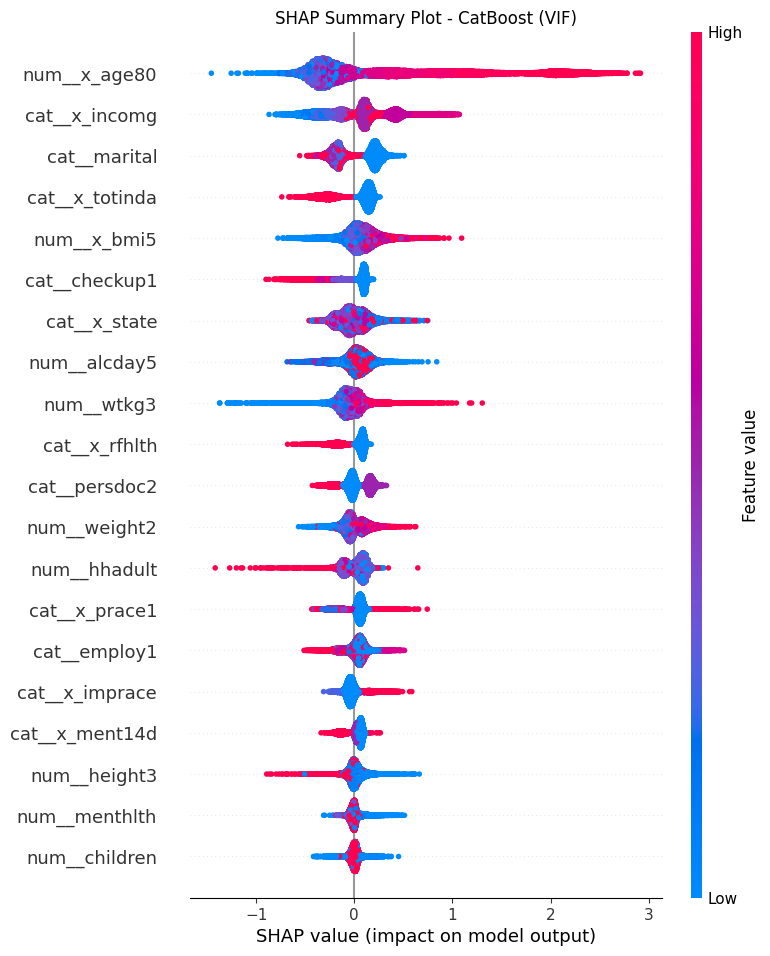


===== Training model: Logistic Regression (VIF) =====
Training completed in 7.15 seconds.
Accuracy: 0.7224 | F1-Score: 0.6663 | AUC: 0.7095


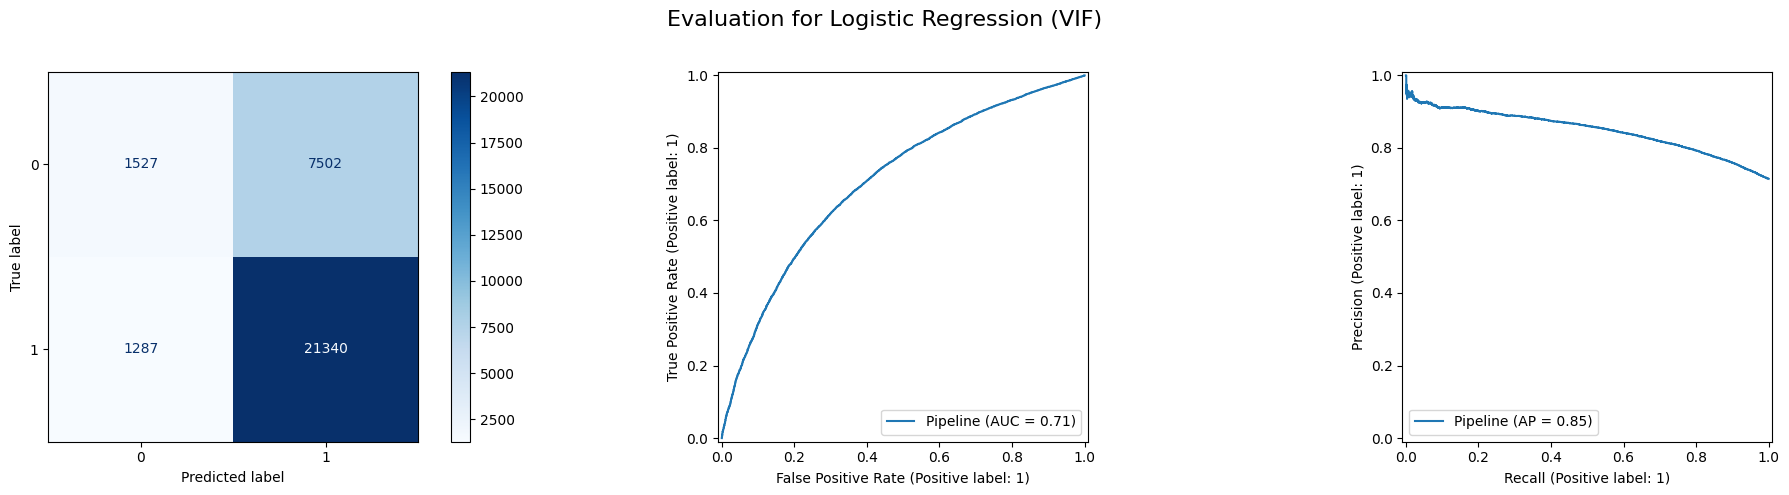


--- Coefficient Analysis ---
           Feature  Coefficient  Odds_Ratio
0     num__x_age80     0.386121    1.471263
12  cat__x_totinda    -0.309106    0.734103
23   cat__x_rfhlth    -0.210954    0.809812
22   cat__checkup1    -0.157440    0.854328
3       num__wtkg3     0.154710    1.167320
18   cat__x_incomg     0.101180    1.106475
17    cat__marital    -0.084225    0.919225
13  cat__x_ment14d    -0.051025    0.950255
6     num__hhadult    -0.043098    0.957818
1      num__x_bmi5     0.040974    1.041825
5    num__children    -0.027822    0.972562
19    cat__employ1    -0.024062    0.976226
9    num__physhlth     0.022535    1.022791
2     num__weight2     0.019894    1.020093
7     num__alcday5    -0.019657    0.980535
10   num__poorhlth     0.018576    1.018749
21   cat__persdoc2    -0.016556    0.983580
14  cat__x_phys14d    -0.011562    0.988505
8    num__menthlth    -0.010593    0.989463
11  cat__x_casthm1    -0.009618    0.990428
4     num__height3    -0.008332    0.991702
15

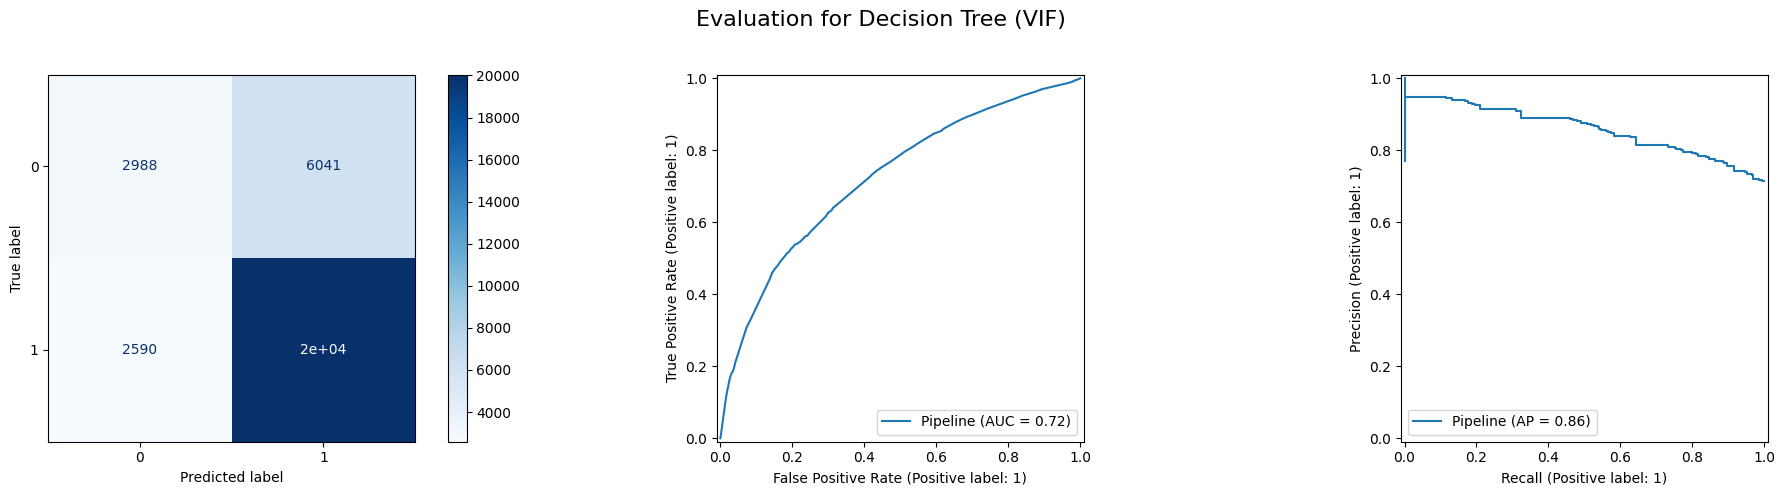


--- Decision Tree Analysis ---


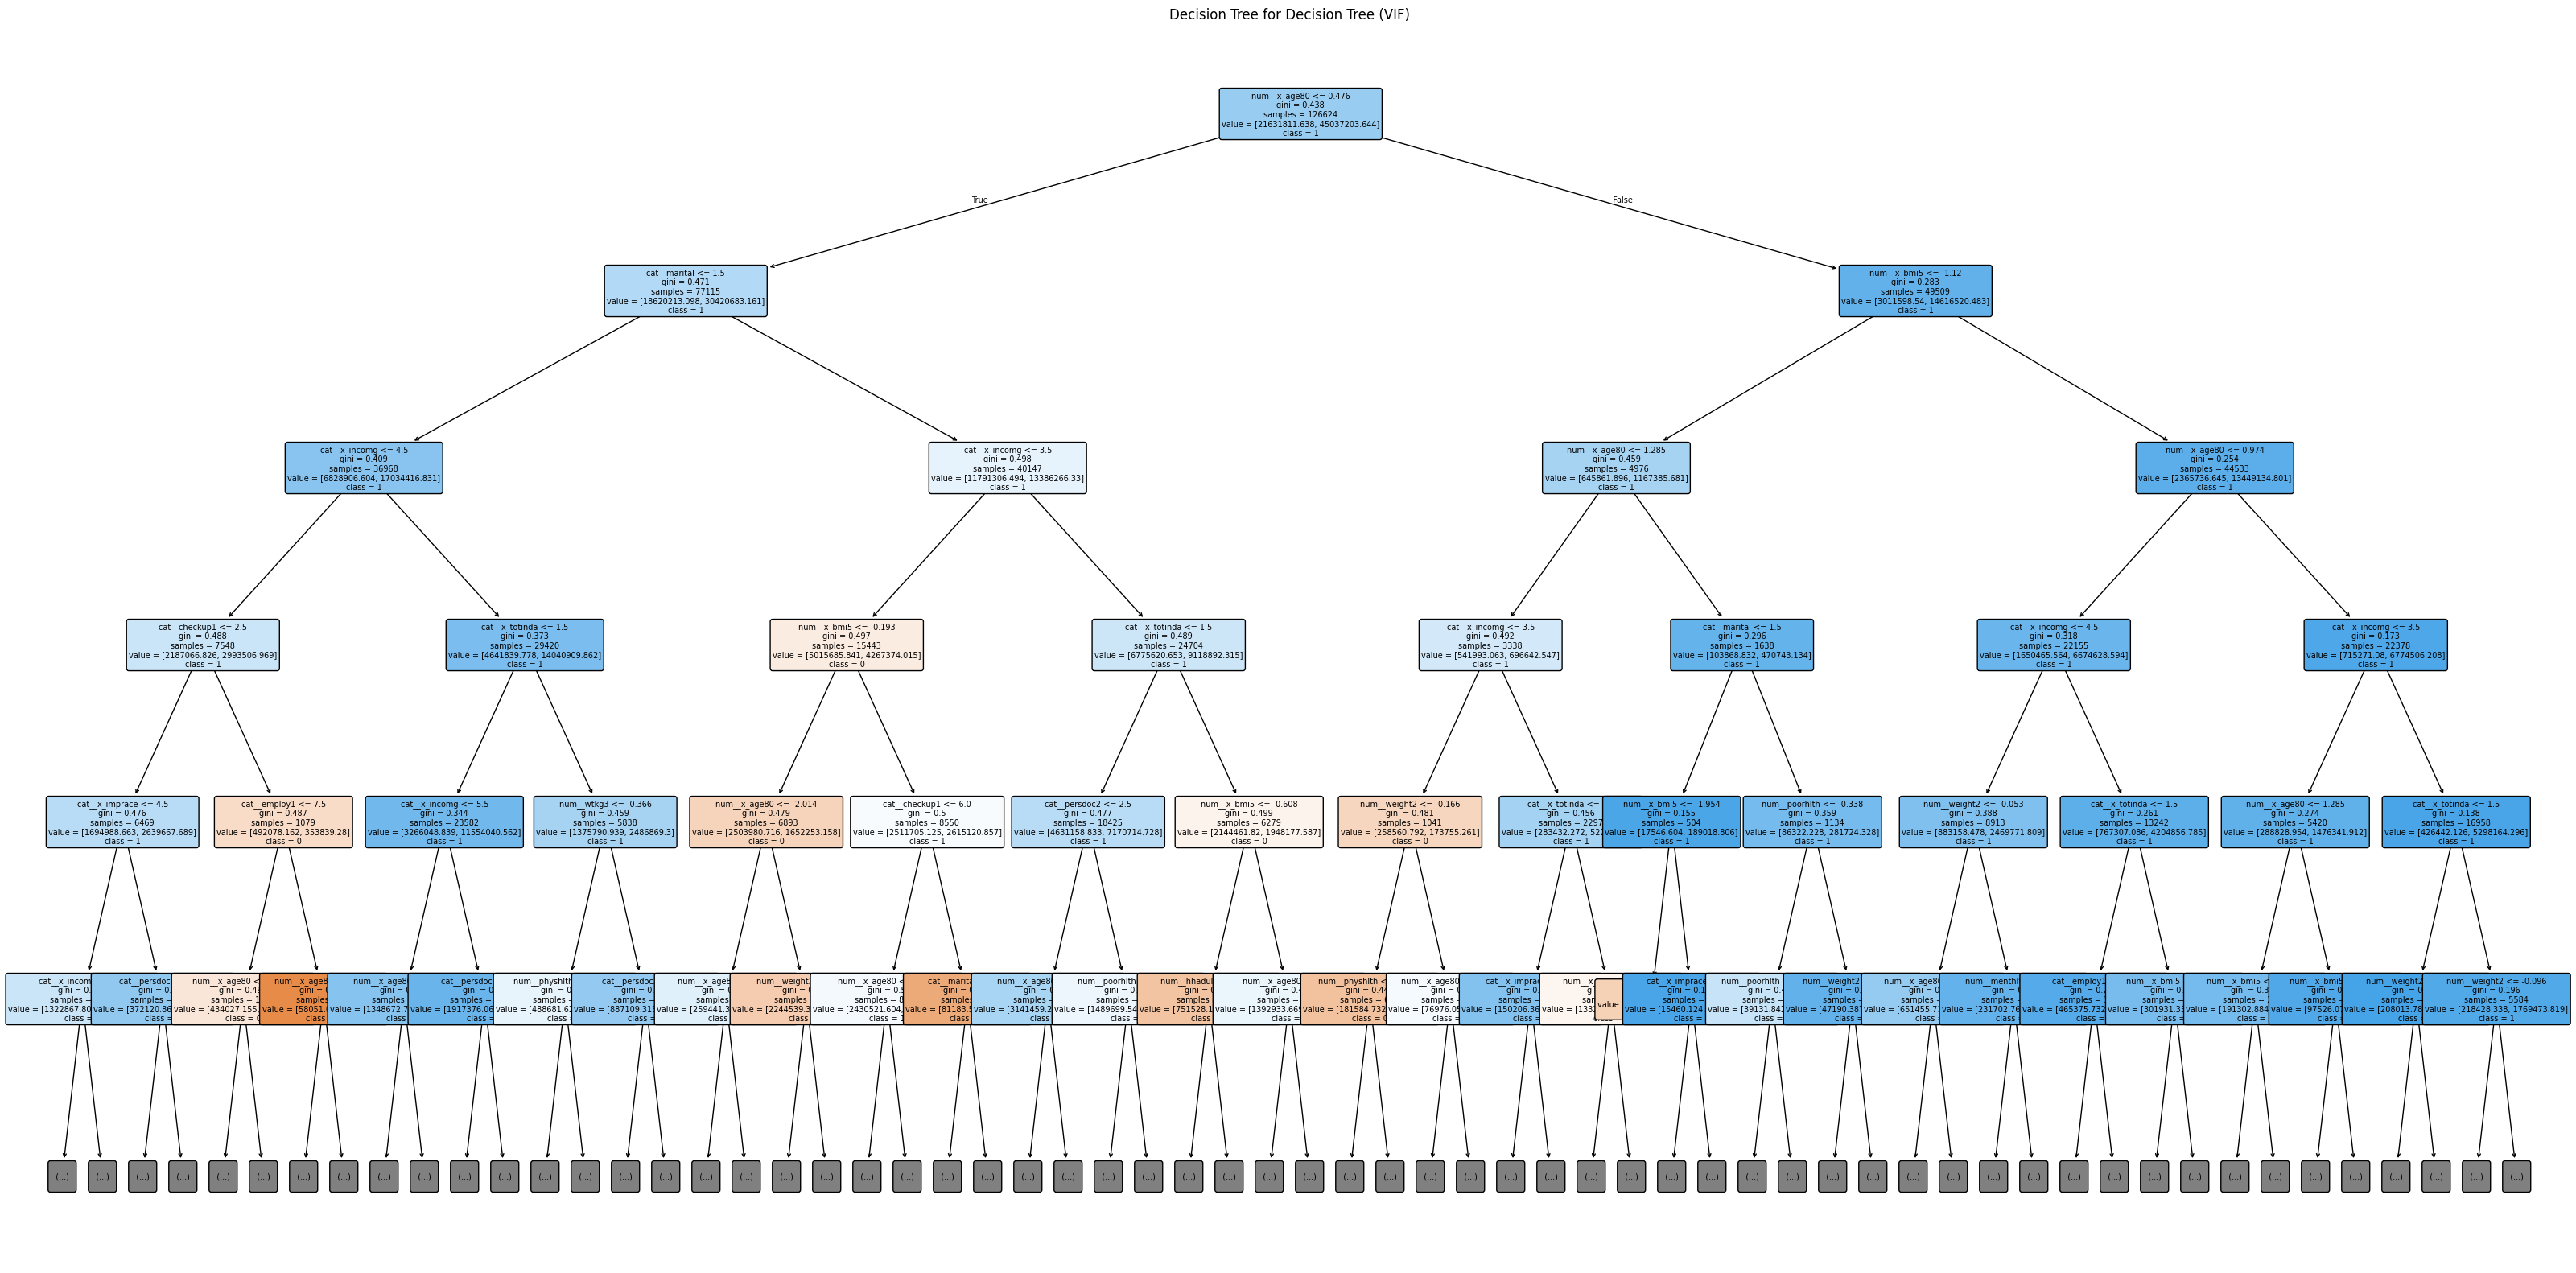

Tree Rules (first few levels):
 |--- num__x_age80 <= 0.48
|   |--- cat__marital <= 1.50
|   |   |--- cat__x_incomg <= 4.50
|   |   |   |--- cat__checkup1 <= 2.50
|   |   |   |   |--- cat__x_imprace <= 4.50
|   |   |   |   |   |--- cat__x_incomg <= 3.50
|   |   |   |   |   |   |--- num__x_age80 <= -0.27
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- num__x_age80 >  -0.27
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- cat__x_incomg >  3.50
|   |   |   |   |   |   |--- num__x_bmi5 <= 1.29
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- num__x_bmi5 >  1.29
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- cat__x_imprace >  4.50
|   |   |   |   |   |--- cat__persdoc2 <= 2.50
|   |   |   |   |   |   |--- num__weight2 <= 13.81
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- num__weight2 >  13.81

===== Training model: LDA (VIF) =====
Model is LDA, fitting without sample_weight.
Training comp

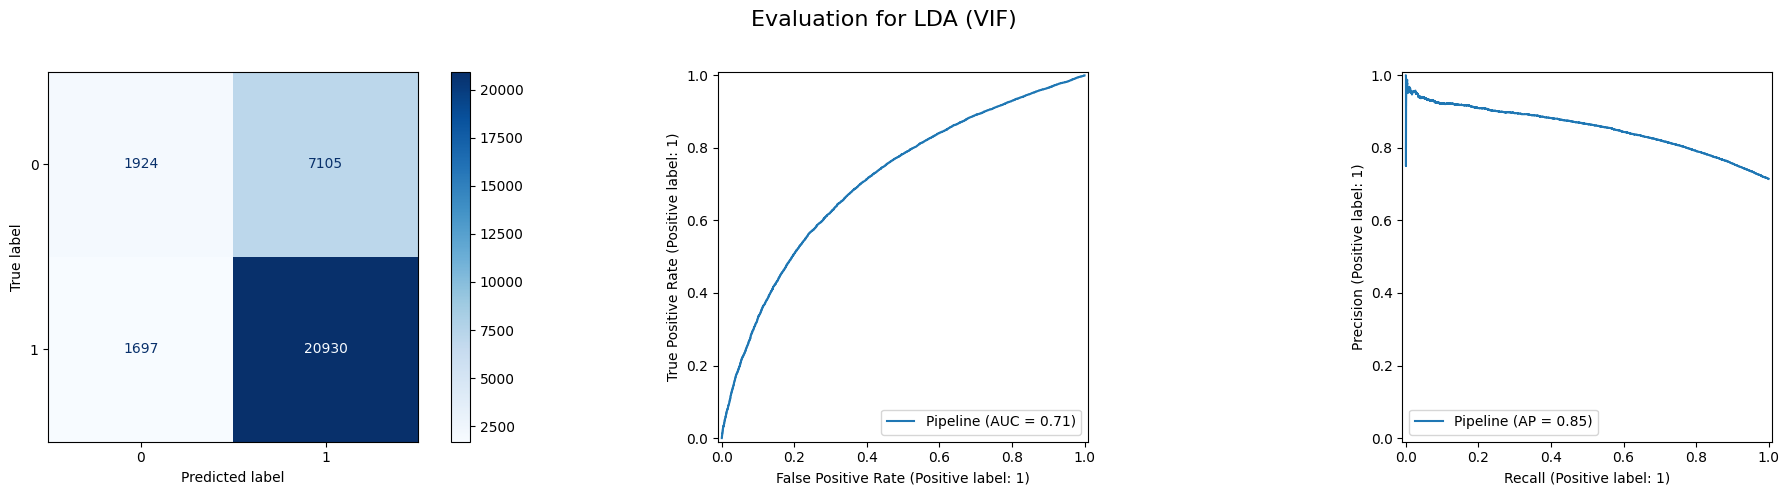


--- Coefficient Analysis ---
           Feature  Coefficient
0     num__x_age80     0.523053
12  cat__x_totinda    -0.339833
23   cat__x_rfhlth    -0.222346
22   cat__checkup1    -0.213186
3       num__wtkg3     0.166078
18   cat__x_incomg     0.115858
17    cat__marital    -0.099105
1      num__x_bmi5     0.082682
13  cat__x_ment14d    -0.068529
7     num__alcday5    -0.056836
5    num__children    -0.054083
15  cat__x_imprace    -0.038412
6     num__hhadult    -0.026140
10   num__poorhlth     0.025327
19    cat__employ1    -0.020117
4     num__height3     0.017527
21   cat__persdoc2     0.012474
14  cat__x_phys14d    -0.011150
8    num__menthlth    -0.010978
11  cat__x_casthm1    -0.006409
2     num__weight2     0.005546
9    num__physhlth     0.001106
16   cat__x_prace1     0.001067
20    cat__x_state     0.000410


In [166]:
# vif features
print("\nAnalysis with VIF Selected Features")
for name, model_constructor in models_to_run_full_suite.items():
    result = run_full_analysis(f"{name} (VIF)", model_constructor, preprocessor_vif, X_vif, y, weights)
    vif_results.append(result)



Analysis with All Features

===== Training model: XGBoost (All Features) =====
Training completed in 2.50 seconds.
Accuracy: 0.6929 | F1-Score: 0.7053 | AUC: 0.7529


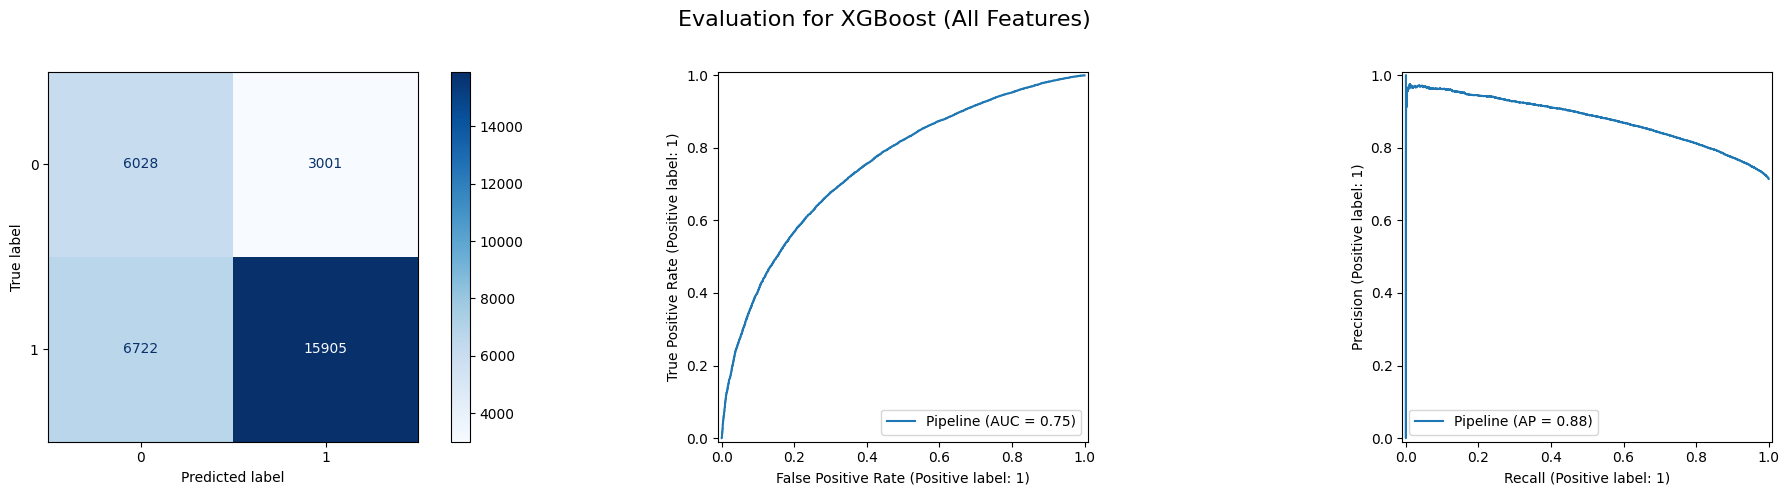


--- SHAP Analysis for XGBoost (All Features) ---


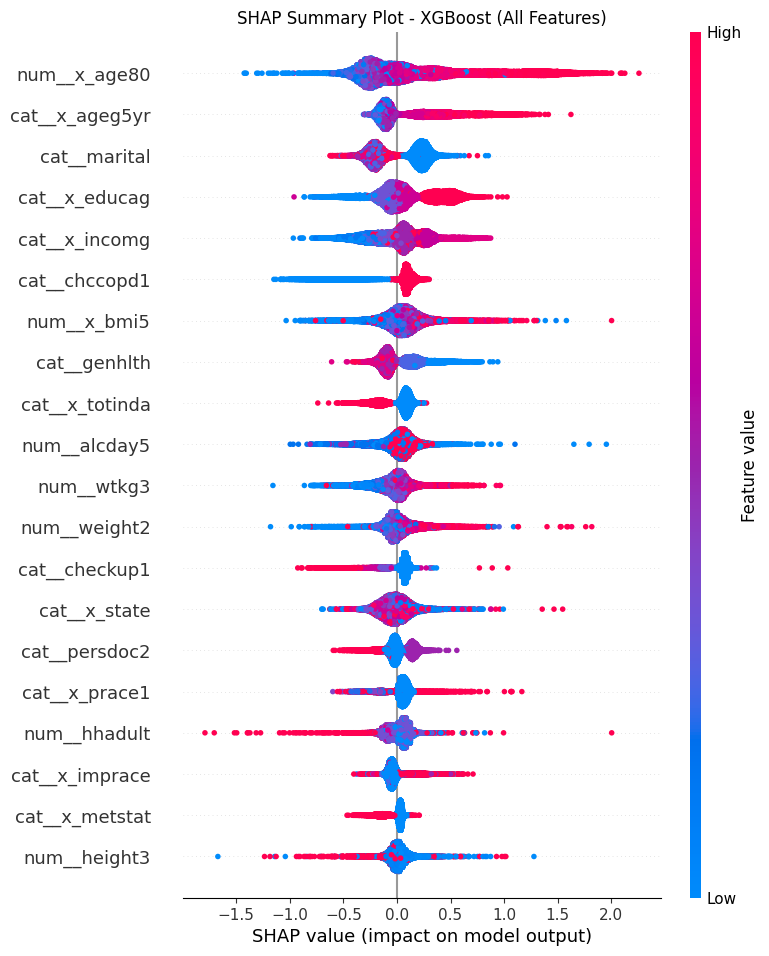


===== Training model: LightGBM (All Features) =====
[LightGBM] [Info] Number of positive: 90507, number of negative: 36117
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1339
[LightGBM] [Info] Number of data points in the train set: 126624, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.675534 -> initscore=0.733324
[LightGBM] [Info] Start training from score 0.733324
Training completed in 3.44 seconds.
Accuracy: 0.6919 | F1-Score: 0.7059 | AUC: 0.7691


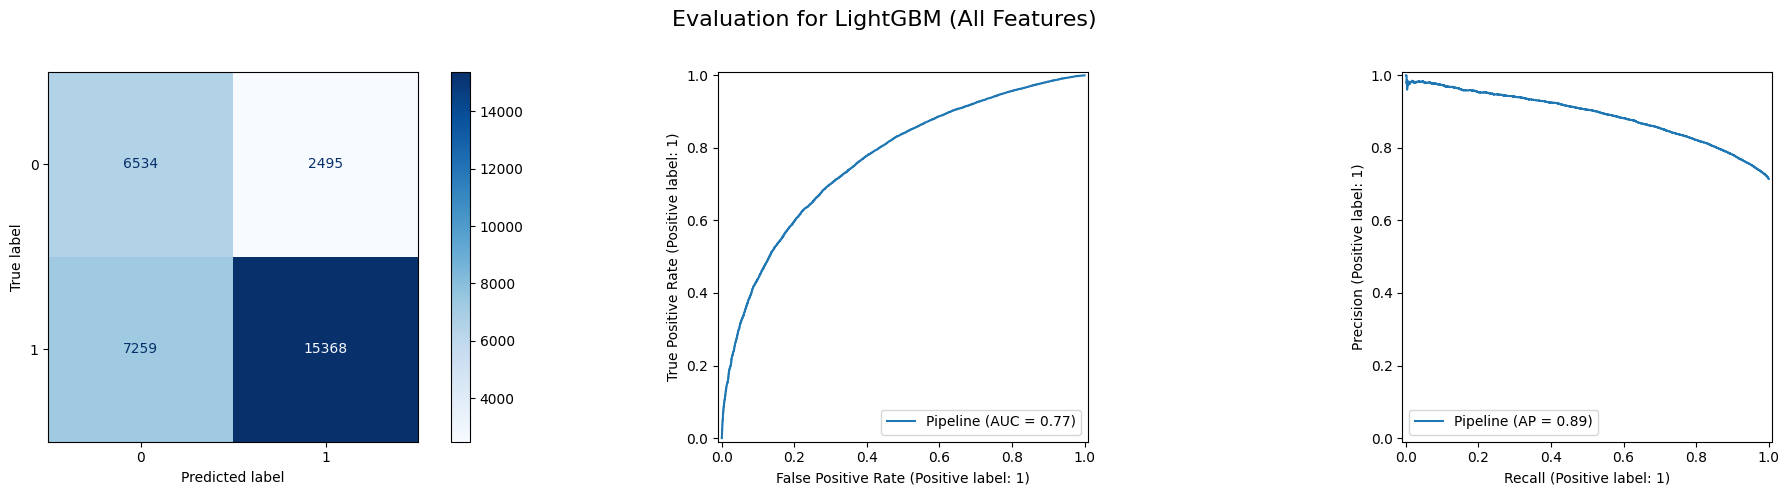


--- SHAP Analysis for LightGBM (All Features) ---


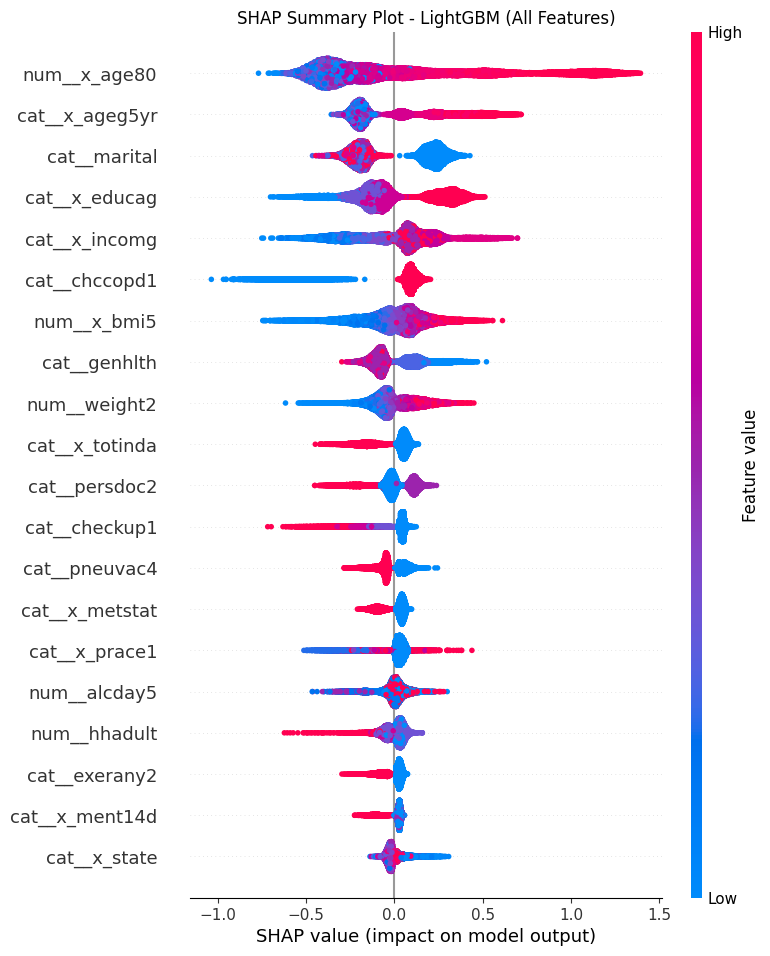


===== Training model: CatBoost (All Features) =====
Training completed in 47.04 seconds.
Accuracy: 0.7014 | F1-Score: 0.7137 | AUC: 0.7663


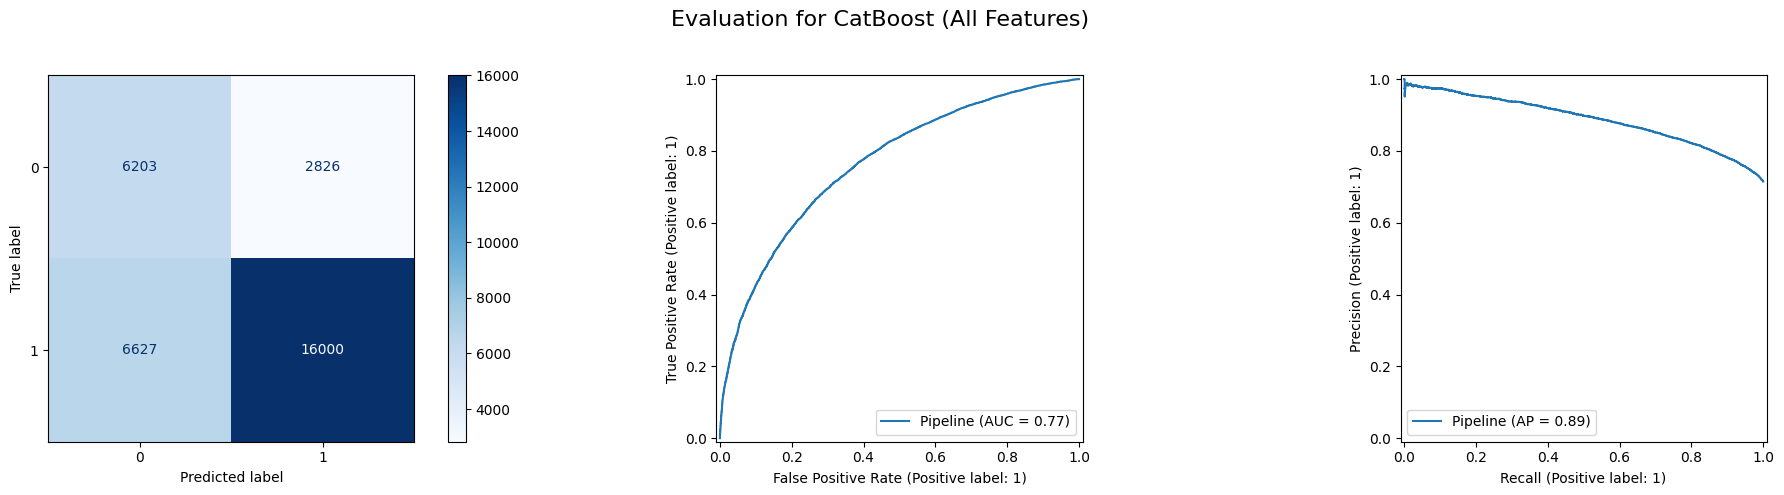


--- SHAP Analysis for CatBoost (All Features) ---


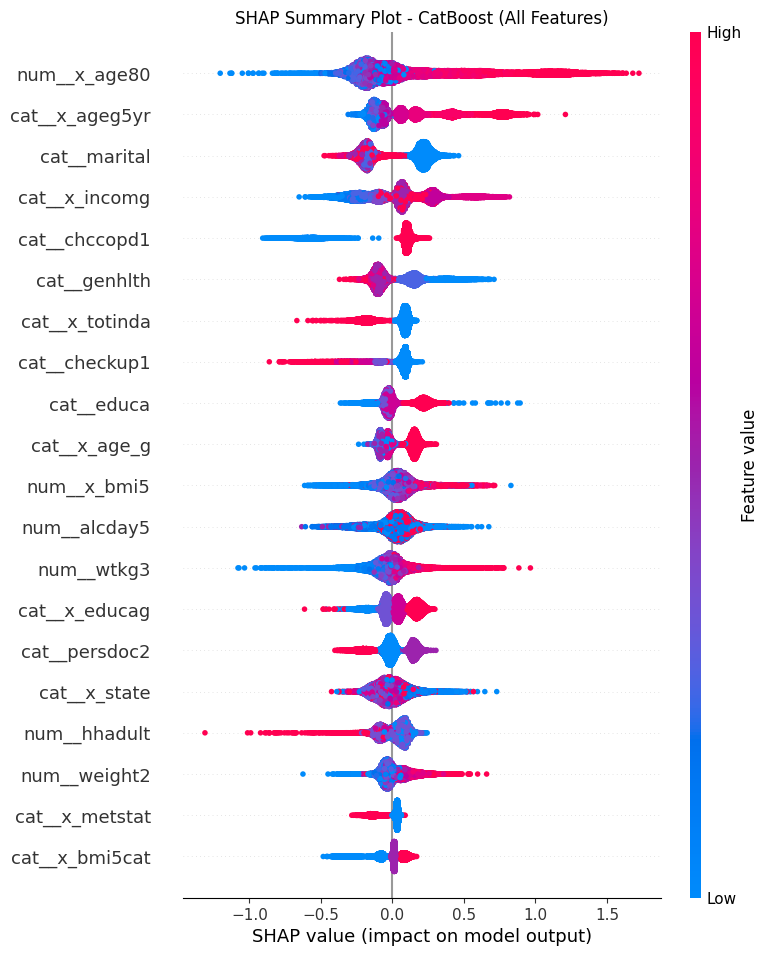


===== Training model: Logistic Regression (All Features) =====
Training completed in 26.70 seconds.
Accuracy: 0.7373 | F1-Score: 0.6999 | AUC: 0.7423


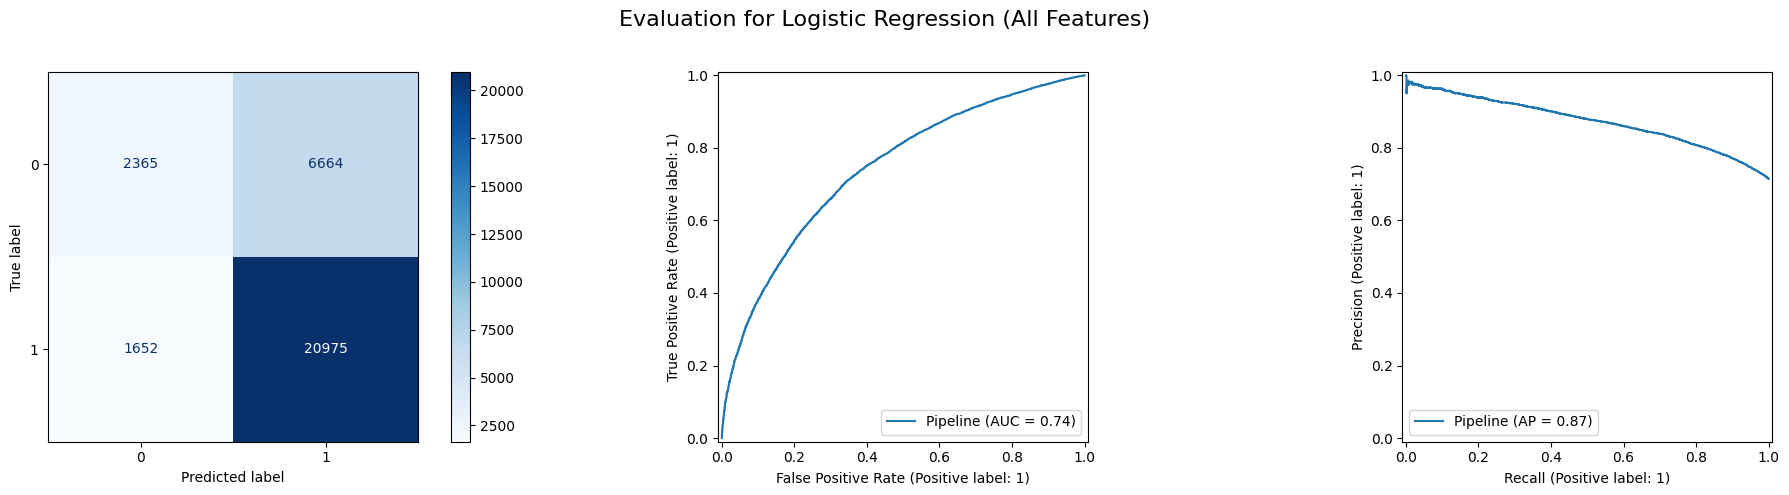


--- Coefficient Analysis ---
           Feature  Coefficient  Odds_Ratio
0     num__x_age80     0.815340    2.259944
39   cat__chccopd1     0.685067    1.983905
13    cat__x_age_g    -0.482757    0.617080
18   cat__exerany2    -0.291167    0.747391
36   cat__cvdcrhd4    -0.278719    0.756752
45   cat__pneuvac4    -0.242150    0.784938
29  cat__x_metstat    -0.217890    0.804214
42   cat__chckdny1    -0.210068    0.810529
37   cat__cvdstrk3     0.169730    1.184985
44   cat__diffwalk     0.165489    1.179970
38    cat__asthma3    -0.160139    0.852025
26      cat__educa     0.136374    1.146111
12    cat__genhlth    -0.134130    0.874477
34   cat__checkup1    -0.133537    0.874995
3       num__wtkg3     0.116506    1.123564
11  cat__x_bmi5cat     0.113993    1.120744
25   cat__x_educag     0.110759    1.117126
41   cat__addepev2     0.089657    1.093799
47  cat__x_ageg5yr     0.081331    1.084730
27    cat__marital    -0.080152    0.922976
40   cat__havarth3    -0.080096    0.923027
28

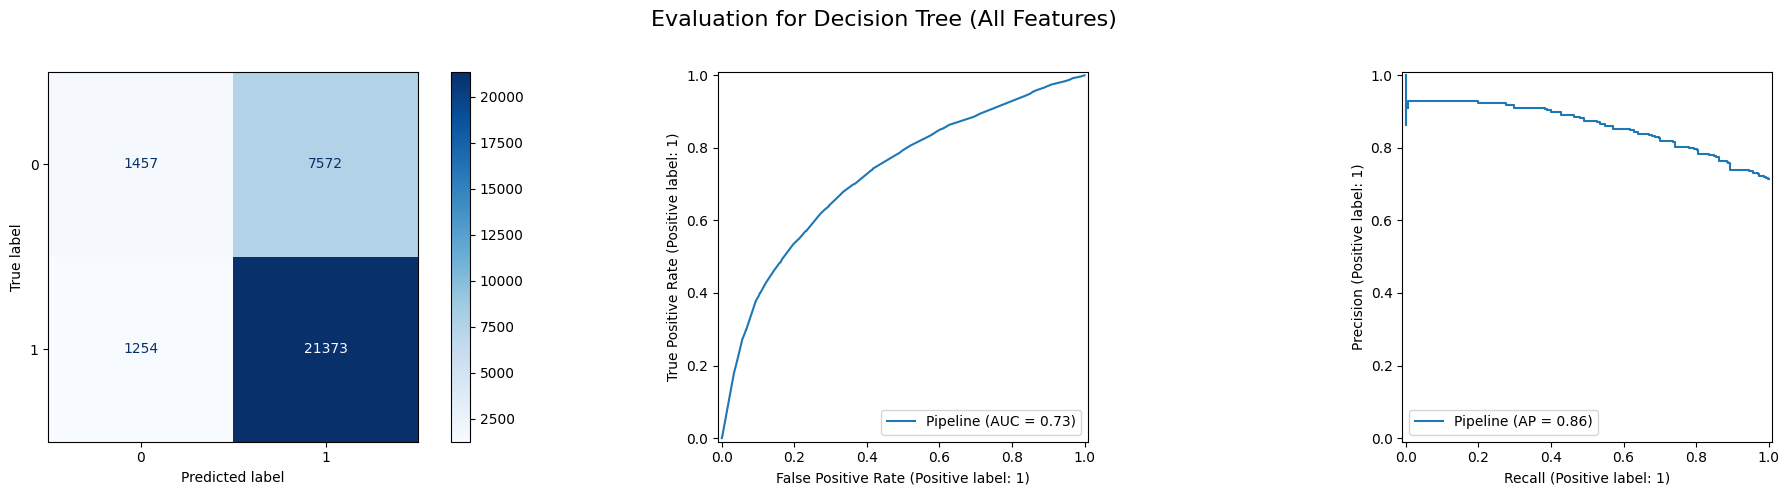


--- Decision Tree Analysis ---


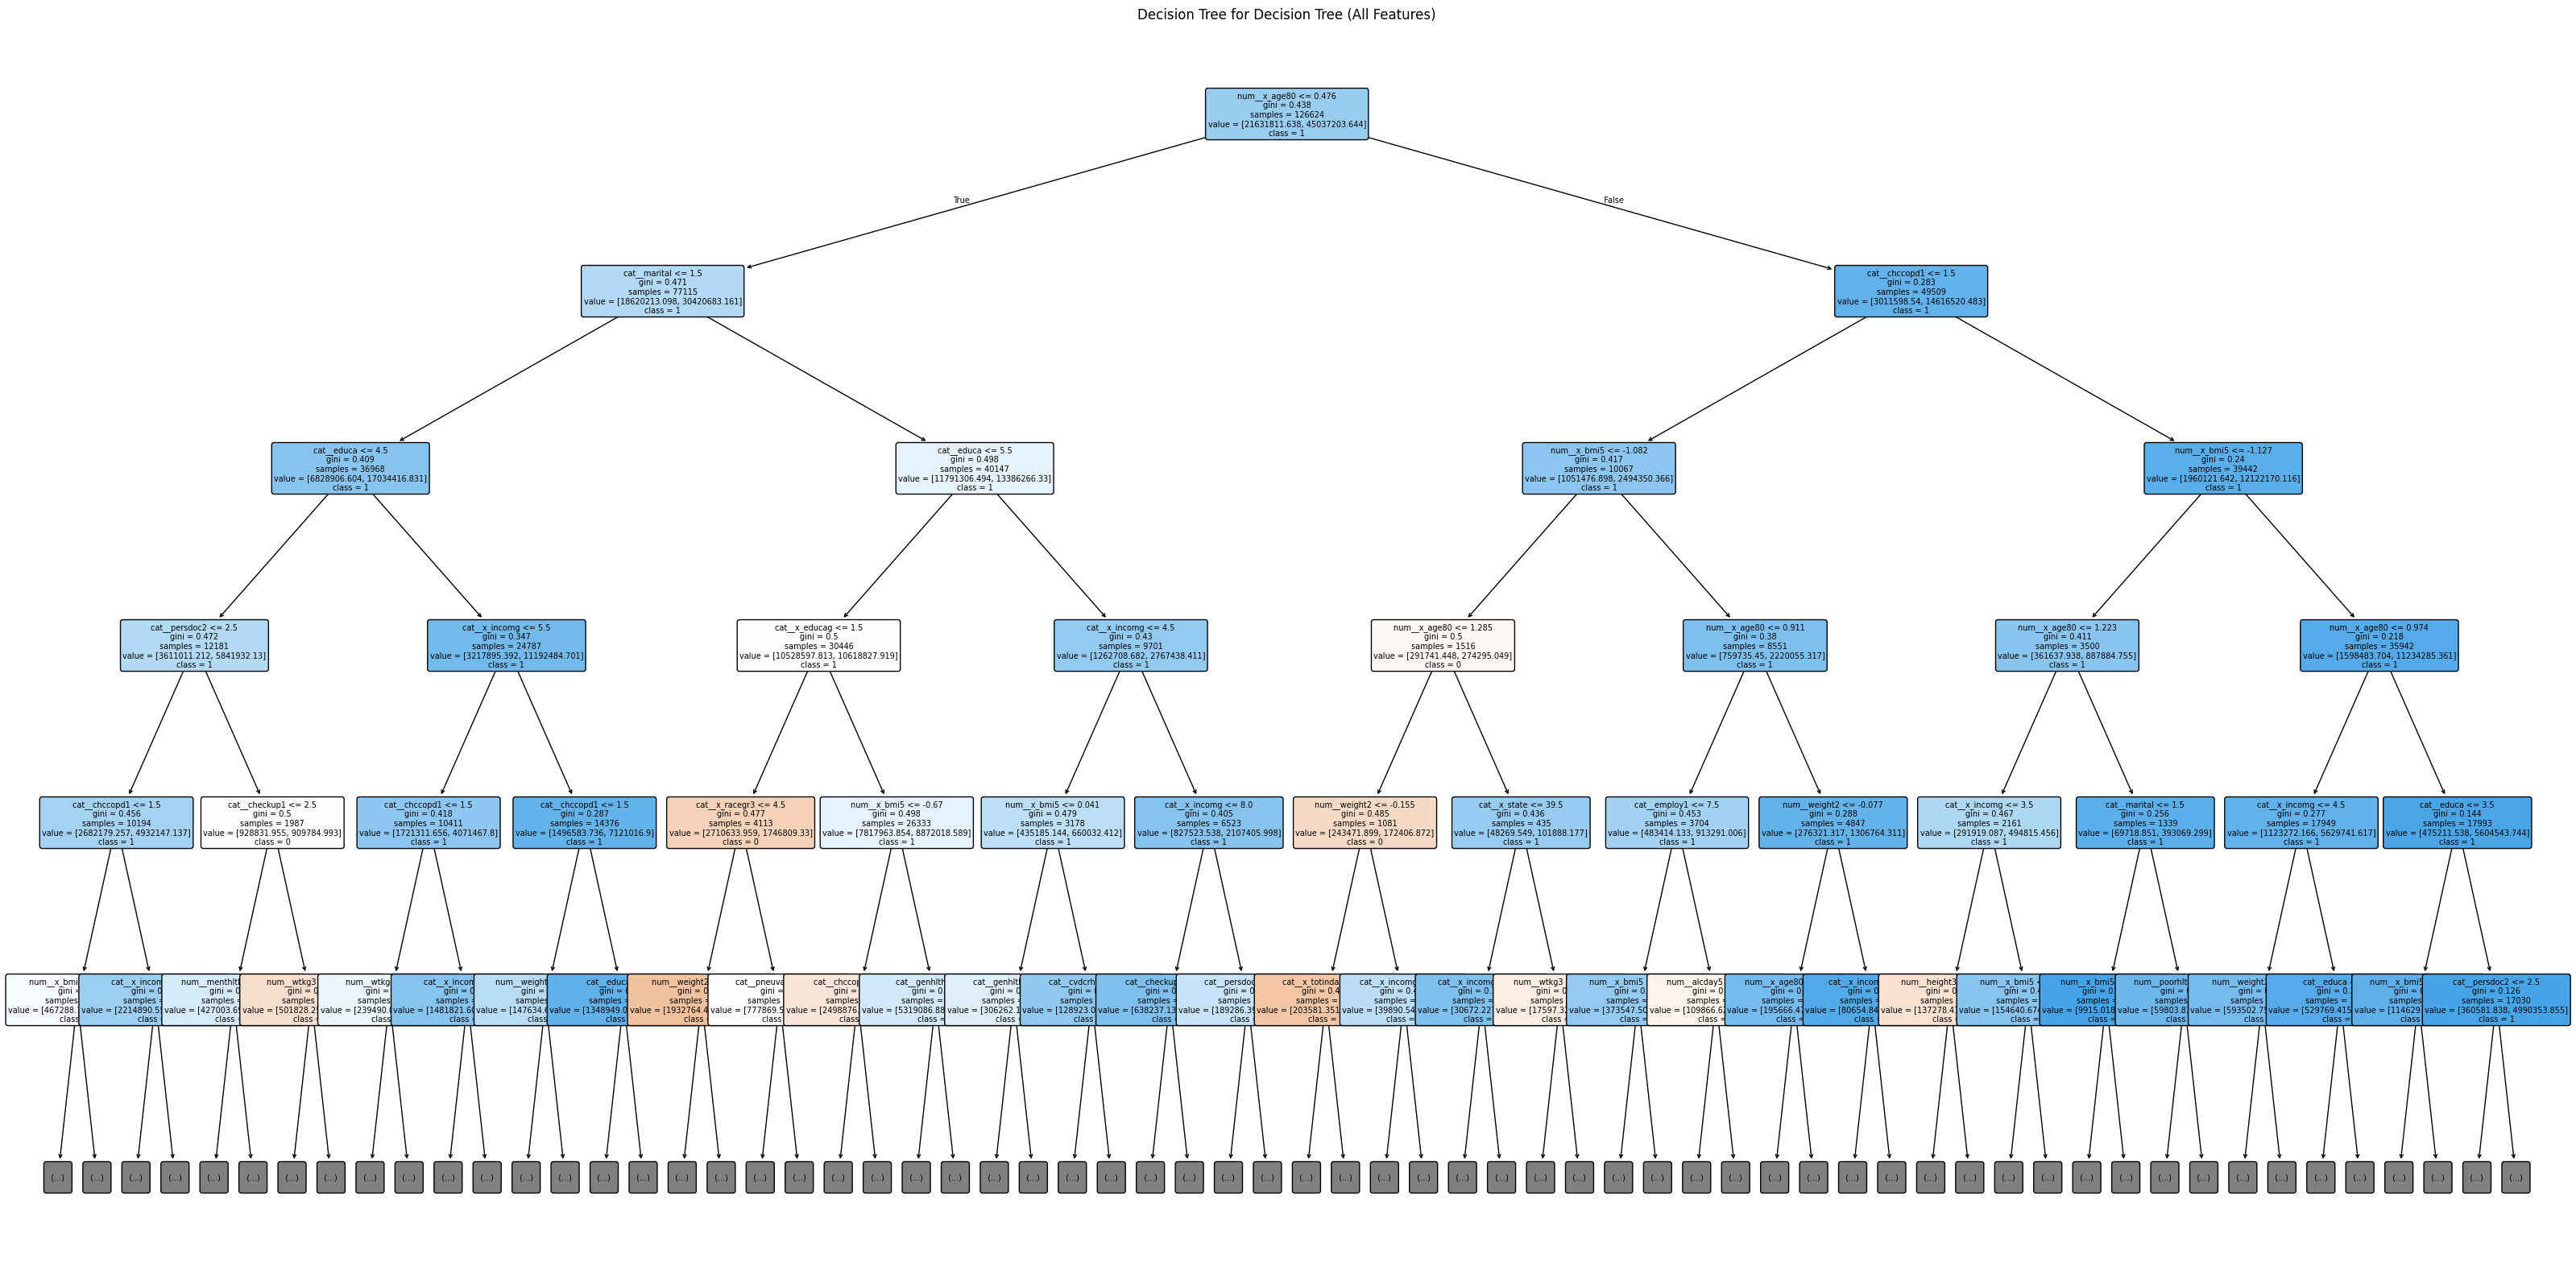

Tree Rules (first few levels):
 |--- num__x_age80 <= 0.48
|   |--- cat__marital <= 1.50
|   |   |--- cat__educa <= 4.50
|   |   |   |--- cat__persdoc2 <= 2.50
|   |   |   |   |--- cat__chccopd1 <= 1.50
|   |   |   |   |   |--- num__x_bmi5 <= -0.09
|   |   |   |   |   |   |--- cat__checkup1 <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- cat__checkup1 >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- num__x_bmi5 >  -0.09
|   |   |   |   |   |   |--- cat__educa <= 2.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- cat__educa >  2.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- cat__chccopd1 >  1.50
|   |   |   |   |   |--- cat__x_incomg <= 3.50
|   |   |   |   |   |   |--- cat__checkup1 <= 2.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- cat__checkup1 >  2.50

===== Training model: LDA (All Features) =====
Model is LDA, fitting without sample_weight.
Training comp

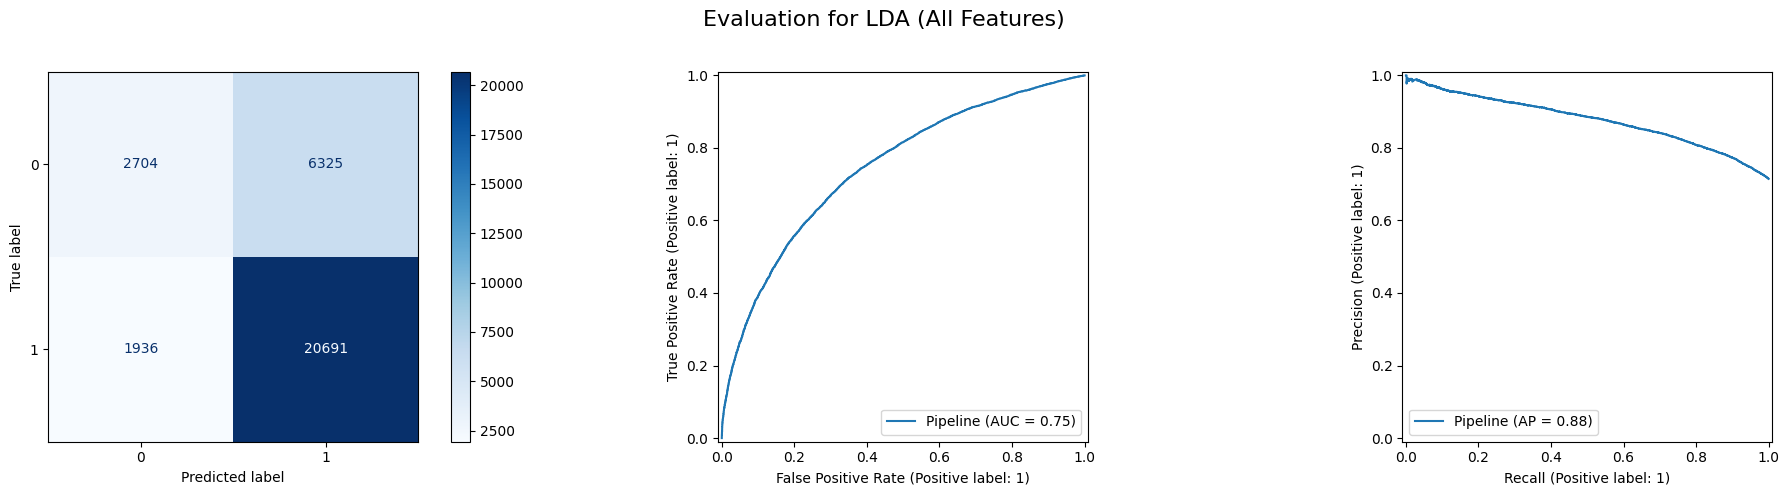


--- Coefficient Analysis ---
           Feature  Coefficient
0     num__x_age80     1.056438
39   cat__chccopd1     0.726523
13    cat__x_age_g    -0.557432
18   cat__exerany2    -0.341412
42   cat__chckdny1    -0.310528
26      cat__educa     0.263837
36   cat__cvdcrhd4    -0.260673
38    cat__asthma3    -0.252241
45   cat__pneuvac4    -0.210222
34   cat__checkup1    -0.196949
12    cat__genhlth    -0.189006
44   cat__diffwalk     0.171017
37   cat__cvdstrk3     0.149927
35   cat__cvdinfr4     0.143098
11  cat__x_bmi5cat     0.132475
41   cat__addepev2     0.131059
29  cat__x_metstat    -0.122337
3       num__wtkg3     0.114961
27    cat__marital    -0.104953
1      num__x_bmi5     0.087947
28   cat__x_incomg     0.079226
40   cat__havarth3    -0.074437
30  cat__x_urbstat    -0.073211
47  cat__x_ageg5yr     0.062691
43   cat__diabete3    -0.062138
17  cat__x_totinda    -0.061774
19  cat__x_ment14d    -0.049748
5    num__children    -0.048471
16  cat__x_casthm1    -0.045119
14  cat__x

In [167]:
# all features
print("\nAnalysis with All Features")
for name, model_constructor in models_to_run_full_suite.items():
    result = run_full_analysis(f"{name} (All Features)", model_constructor, preprocessor, X, y, weights)
    all_features_results.append(result)


In [168]:
# Compare results
print("\nFinal Comparison Table")
vif_df = pd.DataFrame(vif_results)
all_df = pd.DataFrame(all_features_results)
final_results = pd.concat([vif_df, all_df]).set_index('Model')
print(final_results.sort_values(by='AUC', ascending=False))



Final Comparison Table
                                    Accuracy  F1-Score       AUC   Time (s)
Model                                                                      
LightGBM (All Features)             0.691875  0.705908  0.769105   3.442564
CatBoost (All Features)             0.701384  0.713656  0.766346  47.040666
LightGBM (VIF)                      0.674975  0.690250  0.753676   2.983996
XGBoost (All Features)              0.692854  0.705334  0.752898   2.498215
CatBoost (VIF)                      0.684768  0.698297  0.748857  42.203566
LDA (All Features)                  0.739038  0.708678  0.746279   1.095006
Logistic Regression (All Features)  0.737301  0.699936  0.742289  26.703893
XGBoost (VIF)                       0.680471  0.694001  0.737724   1.708811
Decision Tree (All Features)        0.721190  0.663246  0.727424   1.472533
Decision Tree (VIF)                 0.727350  0.704802  0.722980   0.784024
LDA (VIF)                           0.721948  0.677354  0.713026

In [ ]:
final_results.to_csv("final2023.csv")


### PCA

چه کاری انجام می‌دهد؟ PCA ویژگی‌های اولیه شما را به مجموعه‌ای جدید از ویژگی‌های ناهمبسته تبدیل می‌کند و همزمان می‌تواند ابعاد داده را کاهش دهد.

کِی باید استفاده کرد؟ زمانی که قصد دارید از مدل‌های حساس به هم‌خطی (مانند رگرسیون لجستیک) استفاده کنید و رفع هم‌خطی برای شما یک اولویت است.

ویژگی‌های جدید (مؤلفه‌های اصلی) دیگر به راحتی قابل تفسیر نیستند.

یک عیب PCA این است که مؤلفه‌های اصلی جدید، ترکیبی خطی از ویژگی‌های اولیه هستند و دیگر به راحتی قابل تفسیر نیستند. برای مثال، PC1 ممکن است چیزی شبیه به (0.4 * سن) - (0.6 * BMI) + (0.7 * درآمد) باشد. بنابراین، اگر هدف اصلی شما تفسیر ضرایب تک تک ویژگی‌های اولیه باشد، PCA بهترین انتخاب نیست.

In [170]:
pca_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_vif),
    ('pca', PCA(n_components=0.95)),  # n_components: تعداد مؤلفه‌ها
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])


X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X_vif, y, weights, test_size=0.2, random_state=42, stratify=y
)

# ۴. آموزش پایپ‌لاین با استفاده از وزن‌ها (sample_weight)
print("\nآموزش پایپ‌لاین PCA + Logistic Regression با وزن‌های نمونه...")
pca_pipeline.fit(X_train, y_train, classifier__sample_weight=weights_train)
print("آموزش کامل شد.")

# ۵. بررسی نتایج PCA
# می‌توانیم ببینیم PCA چند مؤلفه را انتخاب کرده است
num_components = pca_pipeline.named_steps['pca'].n_components_
print(f"\nتعداد مؤلفه‌های اصلی انتخاب شده توسط PCA (برای حفظ ۹۵٪ واریانس): {num_components}")

# ۶. ارزیابی مدل نهایی
y_pred_pca_lr = pca_pipeline.predict(X_test)

print("\n--- نتایج مدل Logistic Regression پس از PCA ---")
print(f"دقت (Accuracy): {accuracy_score(y_test, y_pred_pca_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca_lr))



آموزش پایپ‌لاین PCA + Logistic Regression با وزن‌های نمونه...
آموزش کامل شد.

تعداد مؤلفه‌های اصلی انتخاب شده توسط PCA (برای حفظ ۹۵٪ واریانس): 4

--- نتایج مدل Logistic Regression پس از PCA ---
دقت (Accuracy): 0.7176

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.04      0.08      9029
           1       0.72      0.99      0.83     22627

    accuracy                           0.72     31656
   macro avg       0.64      0.52      0.46     31656
weighted avg       0.68      0.72      0.62     31656

